## CREDIT EDA : Problem Statement

#### The loan providing companies find it hard to give loans to the people due to their insufficient or non-existent credit history. Because of that, some consumers use it as their advantage by becoming a defaulter. Suppose you work for a consumer finance company which specialises in lending various types of loans to urban customers. You have to use EDA to analyse the patterns present in the data. This will ensure that the applicants are capable of repaying the loan are not rejected.

#### - Importing the required packages

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 250)

#### - Reading data from application_data.csv

In [2]:
application_data = pd.read_csv('application_data.csv')
application_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

#### - Checking the shape of data

In [3]:
application_data.shape

(307511, 122)

#### - Checking the data types of data

In [4]:
application_data.dtypes

SK_ID_CURR                        int64
TARGET                            int64
NAME_CONTRACT_TYPE               object
CODE_GENDER                      object
FLAG_OWN_CAR                     object
FLAG_OWN_REALTY                  object
CNT_CHILDREN                      int64
AMT_INCOME_TOTAL                float64
AMT_CREDIT                      float64
AMT_ANNUITY                     float64
AMT_GOODS_PRICE                 float64
NAME_TYPE_SUITE                  object
NAME_INCOME_TYPE                 object
NAME_EDUCATION_TYPE              object
NAME_FAMILY_STATUS               object
NAME_HOUSING_TYPE                object
REGION_POPULATION_RELATIVE      float64
DAYS_BIRTH                        int64
DAYS_EMPLOYED                     int64
DAYS_REGISTRATION               float64
DAYS_ID_PUBLISH                   int64
OWN_CAR_AGE                     float64
FLAG_MOBIL                        int64
FLAG_EMP_PHONE                    int64
FLAG_WORK_PHONE                   int64


#### - Describing Statistical details of numerical data in Dataframe

In [5]:
application_data.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,0.042553,0.074490,0.145193,0.222315,0.228058,0.064958,0.105645,0.105975,0.008076,0.027022,0.117850,0.087955,0.97

### Null value check and reshaping the data
#### - Inspecting number of Null values columnwise and finding percentage of same

In [6]:
application_data.isnull().sum()

SK_ID_CURR                           0
TARGET                               0
NAME_CONTRACT_TYPE                   0
CODE_GENDER                          0
FLAG_OWN_CAR                         0
FLAG_OWN_REALTY                      0
CNT_CHILDREN                         0
AMT_INCOME_TOTAL                     0
AMT_CREDIT                           0
AMT_ANNUITY                         12
AMT_GOODS_PRICE                    278
NAME_TYPE_SUITE                   1292
NAME_INCOME_TYPE                     0
NAME_EDUCATION_TYPE                  0
NAME_FAMILY_STATUS                   0
NAME_HOUSING_TYPE                    0
REGION_POPULATION_RELATIVE           0
DAYS_BIRTH                           0
DAYS_EMPLOYED                        0
DAYS_REGISTRATION                    0
DAYS_ID_PUBLISH                      0
OWN_CAR_AGE                     202929
FLAG_MOBIL                           0
FLAG_EMP_PHONE                       0
FLAG_WORK_PHONE                      0
FLAG_CONT_MOBILE         

In [7]:
cent_null = round(100*(application_data.isnull().sum()/len(application_data.index)),2)
cent_null

SK_ID_CURR                       0.00
TARGET                           0.00
NAME_CONTRACT_TYPE               0.00
CODE_GENDER                      0.00
FLAG_OWN_CAR                     0.00
FLAG_OWN_REALTY                  0.00
CNT_CHILDREN                     0.00
AMT_INCOME_TOTAL                 0.00
AMT_CREDIT                       0.00
AMT_ANNUITY                      0.00
AMT_GOODS_PRICE                  0.09
NAME_TYPE_SUITE                  0.42
NAME_INCOME_TYPE                 0.00
NAME_EDUCATION_TYPE              0.00
NAME_FAMILY_STATUS               0.00
NAME_HOUSING_TYPE                0.00
REGION_POPULATION_RELATIVE       0.00
DAYS_BIRTH                       0.00
DAYS_EMPLOYED                    0.00
DAYS_REGISTRATION                0.00
DAYS_ID_PUBLISH                  0.00
OWN_CAR_AGE                     65.99
FLAG_MOBIL                       0.00
FLAG_EMP_PHONE                   0.00
FLAG_WORK_PHONE                  0.00
FLAG_CONT_MOBILE                 0.00
FLAG_PHONE  

#### - Dropping columns with Null values pecentage greater than 13%

In [8]:
miss_cols = cent_null[cent_null > 13].index

clean_app_data = application_data.drop(miss_cols, axis=1)
clean_app_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,1,1,1,1,1,0,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,1,1,0,1,0,0,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,1,1,0,1,0,0,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


#### - Checking the shape of data after dropping the columns

In [9]:
clean_app_data.shape

(307511, 65)

#### - Information about the data types, number of columns and rows, number of non-null rows for each column after dropping the columns

In [10]:
clean_app_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 65 columns):
SK_ID_CURR                     307511 non-null int64
TARGET                         307511 non-null int64
NAME_CONTRACT_TYPE             307511 non-null object
CODE_GENDER                    307511 non-null object
FLAG_OWN_CAR                   307511 non-null object
FLAG_OWN_REALTY                307511 non-null object
CNT_CHILDREN                   307511 non-null int64
AMT_INCOME_TOTAL               307511 non-null float64
AMT_CREDIT                     307511 non-null float64
AMT_ANNUITY                    307499 non-null float64
AMT_GOODS_PRICE                307233 non-null float64
NAME_TYPE_SUITE                306219 non-null object
NAME_INCOME_TYPE               307511 non-null object
NAME_EDUCATION_TYPE            307511 non-null object
NAME_FAMILY_STATUS             307511 non-null object
NAME_HOUSING_TYPE              307511 non-null object
REGION_POPULATION_RELATI

#### - Checking the Null values percentage of data after dropping the columns

In [11]:
after_drop_cent = round(100*(clean_app_data.isnull().sum()/len(clean_app_data.index)),2)

#### - Picking the columns with missing value more than 0% and less than 13% from dataframe after dropping the columns

In [12]:
missing_cols = after_drop_cent[after_drop_cent > 0].index

clean_app_data[missing_cols].head(10)

,AMT_GOODS_PRICE,NAME_TYPE_SUITE,EXT_SOURCE_2,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE
0,351000.0,Unaccompanied,0.262949,2.0,2.0,2.0,2.0
1,1129500.0,Family,0.622246,1.0,0.0,1.0,0.0
2,135000.0,Unaccompanied,0.555912,0.0,0.0,0.0,0.0
3,297000.0,Unaccompanied,0.650442,2.0,0.0,2.0,0.0
4,513000.0,Unaccompanied,0.322738,0.0,0.0,0.0,0.0
5,454500.0,"Spouse, partner",0.354225,0.0,0.0,0.0,0.0
6,1395000.0,Unaccompanied,0.724000,1.0,0.0,1.0,0.0
7,1530000.0,Unaccompanied,0.714279,2.0,0.0,2.0,0.0
8,913500.0,Children,0.205747,1.0,0.0,1.0,0.0
9,405000.0,Unaccompanied,0.746644,2.0,0.0,2.0,0.0


### Handling missing values and imputation metric
#### - Plotting the below columns to see the distribution of data in these columns

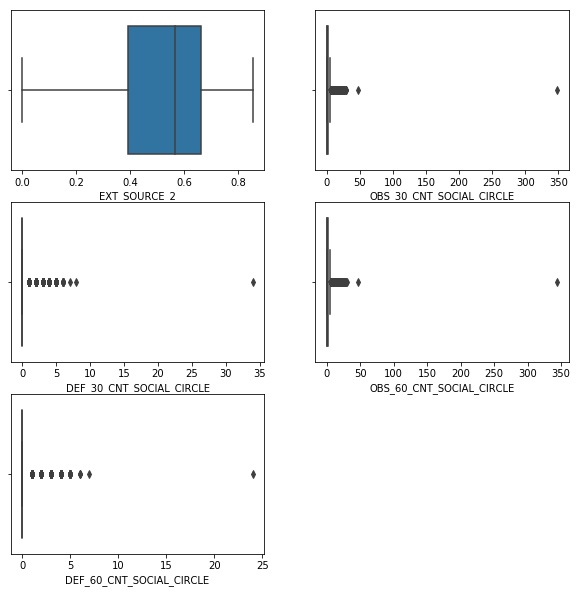

In [13]:
plt.figure(figsize=(10,10))
plt.subplot(3,2,1)
sns.boxplot(clean_app_data.EXT_SOURCE_2)
plt.subplot(3,2,2)
sns.boxplot(clean_app_data.OBS_30_CNT_SOCIAL_CIRCLE)
plt.subplot(3,2,3)
sns.boxplot(clean_app_data.DEF_30_CNT_SOCIAL_CIRCLE)
plt.subplot(3,2,4)
sns.boxplot(clean_app_data.OBS_60_CNT_SOCIAL_CIRCLE)
plt.subplot(3,2,5)
sns.boxplot(clean_app_data.DEF_60_CNT_SOCIAL_CIRCLE)
plt.show()

#### - Statistical description of EXT_SOURCE_2 column

In [14]:
clean_app_data.EXT_SOURCE_2.describe()

count    3.068510e+05
mean     5.143927e-01
std      1.910602e-01
min      8.173617e-08
25%      3.924574e-01
50%      5.659614e-01
75%      6.636171e-01
max      8.549997e-01
Name: EXT_SOURCE_2, dtype: float64

- **Observation:** The null values can be imputed using mean or median in above column

#### - Statistical description of below columns

In [15]:
print('{}\n'.format(clean_app_data.OBS_30_CNT_SOCIAL_CIRCLE.describe()))
print('{}\n'.format(clean_app_data.OBS_60_CNT_SOCIAL_CIRCLE.describe()))
print('{}\n'.format(clean_app_data.DEF_30_CNT_SOCIAL_CIRCLE.describe()))
print(clean_app_data.DEF_60_CNT_SOCIAL_CIRCLE.describe())

count    306490.000000
mean          1.422245
std           2.400989
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max         348.000000
Name: OBS_30_CNT_SOCIAL_CIRCLE, dtype: float64

count    306490.000000
mean          1.405292
std           2.379803
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max         344.000000
Name: OBS_60_CNT_SOCIAL_CIRCLE, dtype: float64

count    306490.000000
mean          0.143421
std           0.446698
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          34.000000
Name: DEF_30_CNT_SOCIAL_CIRCLE, dtype: float64

count    306490.000000
mean          0.100049
std           0.362291
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          24.000000
Name: DEF_60_CNT_SOCIAL_CIRCLE, dtype: float64


- **Observation:** The outliers are spread over 75th and 100th quantile

#### - Statistical description of below columns by considering the data lying within 99th quantile

In [16]:
print('{}\n'.format(clean_app_data.OBS_30_CNT_SOCIAL_CIRCLE[clean_app_data.OBS_30_CNT_SOCIAL_CIRCLE <= 
                                        clean_app_data.OBS_30_CNT_SOCIAL_CIRCLE.quantile(0.99)].describe()))
print('{}\n'.format(clean_app_data.OBS_60_CNT_SOCIAL_CIRCLE[clean_app_data.OBS_60_CNT_SOCIAL_CIRCLE <= 
                                        clean_app_data.OBS_60_CNT_SOCIAL_CIRCLE.quantile(0.99)].describe()))
print('{}\n'.format(clean_app_data.DEF_30_CNT_SOCIAL_CIRCLE[clean_app_data.DEF_30_CNT_SOCIAL_CIRCLE <= 
                                        clean_app_data.DEF_30_CNT_SOCIAL_CIRCLE.quantile(0.99)].describe()))
print(clean_app_data.DEF_60_CNT_SOCIAL_CIRCLE[clean_app_data.DEF_60_CNT_SOCIAL_CIRCLE <= 
                                        clean_app_data.DEF_60_CNT_SOCIAL_CIRCLE.quantile(0.99)].describe())

count    303708.000000
mean          1.312685
std           2.012322
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max          10.000000
Name: OBS_30_CNT_SOCIAL_CIRCLE, dtype: float64

count    303799.000000
mean          1.299270
std           1.999874
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max          10.000000
Name: OBS_60_CNT_SOCIAL_CIRCLE, dtype: float64

count    304975.000000
mean          0.127794
std           0.382585
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           2.000000
Name: DEF_30_CNT_SOCIAL_CIRCLE, dtype: float64

count    305732.000000
mean          0.092176
std           0.323136
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           2.000000
Name: DEF_60_CNT_SOCIAL_CIRCLE, dtype: float64


- **Observation:** Till 99th quantile there isn't any significant impact.

#### - Plotting the below columns taking data points lying within 99th quantile

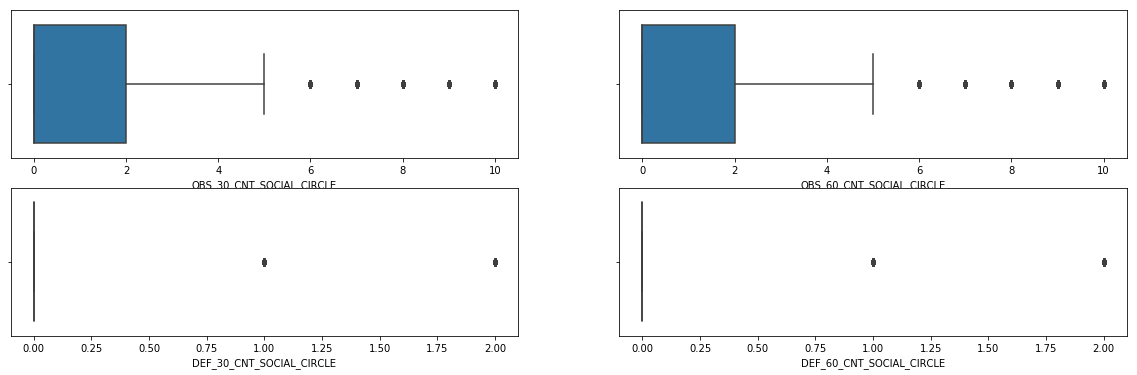

In [17]:
plt.figure(figsize=(20,6))
plt.subplot(2,2,1)
sns.boxplot(clean_app_data.OBS_30_CNT_SOCIAL_CIRCLE[clean_app_data.OBS_30_CNT_SOCIAL_CIRCLE <= 
                                        clean_app_data.OBS_30_CNT_SOCIAL_CIRCLE.quantile(0.99)])
plt.subplot(2,2,2)
sns.boxplot(clean_app_data.OBS_60_CNT_SOCIAL_CIRCLE[clean_app_data.OBS_60_CNT_SOCIAL_CIRCLE <= 
                                        clean_app_data.OBS_60_CNT_SOCIAL_CIRCLE.quantile(0.99)])
plt.subplot(2,2,3)
sns.boxplot(clean_app_data.DEF_30_CNT_SOCIAL_CIRCLE[clean_app_data.DEF_30_CNT_SOCIAL_CIRCLE <= 
                                        clean_app_data.DEF_30_CNT_SOCIAL_CIRCLE.quantile(0.99)])
plt.subplot(2,2,4)
sns.boxplot(clean_app_data.DEF_60_CNT_SOCIAL_CIRCLE[clean_app_data.DEF_60_CNT_SOCIAL_CIRCLE <= 
                                        clean_app_data.DEF_60_CNT_SOCIAL_CIRCLE.quantile(0.99)])
plt.show()

**Observation:**
- The null values can be imputed using mean after treating the outliers for the columns OBS_30_CNT_SOCIAL_CIRCLE and OBS_60_CNT_SOCIAL_CIRCLE. 
- The null values can be imputed with 0 for columns DEF_30_CNT_SOCIAL_CIRCLE and DEF_60_CNT_SOCIAL_CIRCLE

#### - Checking the unique categories and top category in Categorical data and also plotting the same  

In [18]:
clean_app_data.NAME_TYPE_SUITE.describe(include=object)

count            306219
unique                7
top       Unaccompanied
freq             248526
Name: NAME_TYPE_SUITE, dtype: object

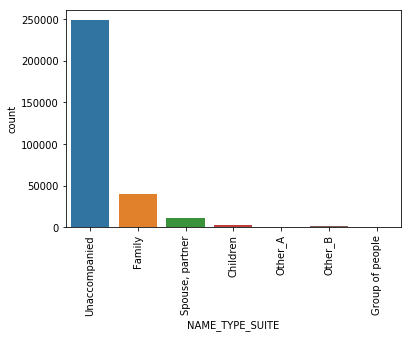

In [19]:
sns.countplot(clean_app_data.NAME_TYPE_SUITE)
plt.xticks(rotation=90)
plt.show()

- **Observation:** The null values can be imputed with `Unaccompanied` as it has highest frequency

#### - Statistical description of below column

In [20]:
clean_app_data.AMT_GOODS_PRICE.describe()

count    3.072330e+05
mean     5.383962e+05
std      3.694465e+05
min      4.050000e+04
25%      2.385000e+05
50%      4.500000e+05
75%      6.795000e+05
max      4.050000e+06
Name: AMT_GOODS_PRICE, dtype: float64

#### - Plotting the below columns to see the spread of data

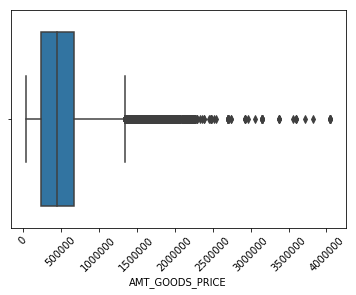

In [21]:
sns.boxplot(clean_app_data.AMT_GOODS_PRICE)
plt.xticks(rotation=45)
plt.show()

- **Observation:** Since the outliers is found to be in the higher quantile, it would be good to clip at the 95th quantile.

#### - Statistical description taking data points lying within 95th quantile

In [22]:
clean_app_data.AMT_GOODS_PRICE.clip_upper(clean_app_data.AMT_GOODS_PRICE.quantile(0.95)).describe()

count    3.072330e+05
mean     5.261670e+05
std      3.329772e+05
min      4.050000e+04
25%      2.385000e+05
50%      4.500000e+05
75%      6.795000e+05
max      1.305000e+06
Name: AMT_GOODS_PRICE, dtype: float64

- **Observation:** The null values can be imputed using mean

### Conversion or formating the columns
#### - Converting the data type of columns or format of data for selected columns

In [23]:
clean_app_data.CNT_FAM_MEMBERS.fillna(0, inplace=True)

clean_app_data.CNT_FAM_MEMBERS = clean_app_data.CNT_FAM_MEMBERS.astype('int64')

#### - Derived column AGE from DAYS_BIRTH column

In [24]:
clean_app_data['AGE'] = round(abs(clean_app_data.DAYS_BIRTH)/365.25, 2)
clean_app_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AGE
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,1,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,25.90
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,2,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,45.90
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,1,1,1,1,1,0,1,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,52.15
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,1,1,0,1,0,0,2,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,52.03
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,1,1,0,1,0,0,1,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,54.57


#### - Creating new column LOAN_PERIOD from AMT_CREDIT and AMT_ANNUITY

In [25]:
clean_app_data['LOAN_PERIOD'] = round(clean_app_data.AMT_CREDIT/clean_app_data.AMT_ANNUITY, 4)
clean_app_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AGE,LOAN_PERIOD
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,1,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,25.90,16.4611
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,2,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,45.90,36.2341
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,1,1,1,1,1,0,1,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,52.15,20.0000
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,1,1,0,1,0,0,2,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,52.03,10.5328
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,1,1,0,1,0,0,1,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,54.57,23.4616


### Outlier treatment
#### - Imputing the AMT_ANNUITY column using suitable methods then Treating the outliers

In [26]:
clean_app_data.AMT_ANNUITY.describe()

count    307499.000000
mean      27108.573909
std       14493.737315
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64

#### -  Imputing using mean value

In [27]:
clean_app_data.AMT_ANNUITY.fillna(clean_app_data.AMT_ANNUITY.mean(),inplace=True)

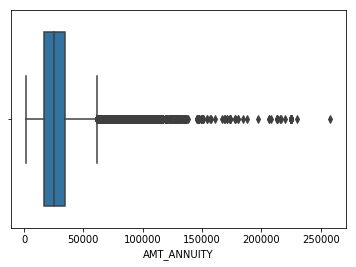

In [28]:
sns.boxplot(clean_app_data.AMT_ANNUITY)
plt.show()

- **Observation:** There are huge number of outliers which can be treated

#### - Treating the outliers using IQR method

In [29]:
q1_annuity=clean_app_data.AMT_ANNUITY.quantile(0.25)
q3_annuity=clean_app_data.AMT_ANNUITY.quantile(0.75)
iqr_annuity=q3_annuity-q1_annuity
annuity_low=q1_annuity-1.5*iqr_annuity
annuity_high=q3_annuity+1.5*iqr_annuity

#### - Clippping outliers instead of removing them so that the outliers influence would be limited to the maximum of the clip percentile values

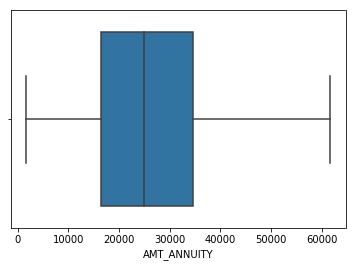

In [30]:
clean_app_data.AMT_ANNUITY = clean_app_data.AMT_ANNUITY.clip(annuity_low,annuity_high)
sns.boxplot(clean_app_data.AMT_ANNUITY)
plt.show()

- **Observation:** Outliers are handled after clipping

#### - Imputing the AMT_INCOME_TOTAL column using suitable methods then Treating the outliers

In [31]:
clean_app_data.AMT_INCOME_TOTAL.describe()

count    3.075110e+05
mean     1.687979e+05
std      2.371231e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

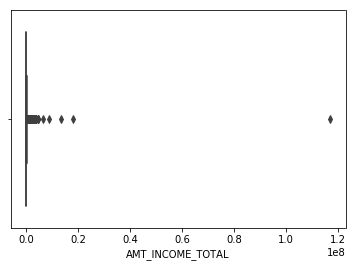

In [32]:
sns.boxplot(clean_app_data.AMT_INCOME_TOTAL)
plt.show()

- **Observation:** The outlier has huge impact on the column data values

#### - Treating the outliers using IQR method

In [33]:
q1_income=clean_app_data.AMT_INCOME_TOTAL.quantile(0.25)
q3_income=clean_app_data.AMT_INCOME_TOTAL.quantile(0.75)
iqr_income=q3_income-q1_income
income_low=q1_income-1.5*iqr_income
income_high=q3_income+1.5*iqr_income

#### - Clippping outliers instead of removing them so that the outliers influence would be limited to the maximum of the clip percentile values

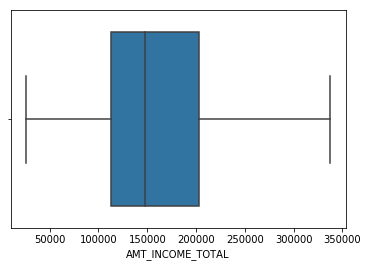

In [34]:
clean_app_data.AMT_INCOME_TOTAL = clean_app_data.AMT_INCOME_TOTAL.clip(income_low,income_high)
sns.boxplot(clean_app_data.AMT_INCOME_TOTAL)
plt.show()

- **Observation:** The outlier has been handled after clipping

#### - Imputing the AMT_CREDIT column using suitable methods then Treating the outliers

In [35]:
clean_app_data.AMT_CREDIT.describe()

count    3.075110e+05
mean     5.990260e+05
std      4.024908e+05
min      4.500000e+04
25%      2.700000e+05
50%      5.135310e+05
75%      8.086500e+05
max      4.050000e+06
Name: AMT_CREDIT, dtype: float64

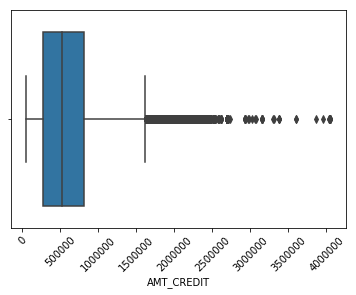

In [36]:
sns.boxplot(clean_app_data.AMT_CREDIT)
plt.xticks(rotation=45)
plt.show()

- **Observation:** There are huge number of outliers which can be treated

#### - Treating the outliers using IQR method

In [37]:
q1_credit=clean_app_data.AMT_CREDIT.quantile(0.25)
q3_credit=clean_app_data.AMT_CREDIT.quantile(0.75)
iqr_credit=q3_credit-q1_credit
credit_low=q1_credit-1.5*iqr_credit
credit_high=q3_credit+1.5*iqr_credit

#### - Clippping outliers instead of removing them so that the outliers influence would be limited to the maximum of the clip percentile values

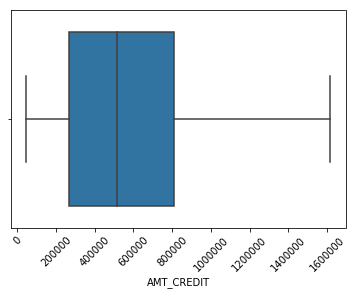

In [38]:
clean_app_data.AMT_CREDIT = clean_app_data.AMT_CREDIT.clip(credit_low,credit_high)
sns.boxplot(clean_app_data.AMT_CREDIT)
plt.xticks(rotation=45)
plt.show()

- **Observation:** The outliers are treated after clipping

#### - As mentioned previously the outliers in AMT_GOODS_PRICE column are treating by clipping to 95th quantile

In [39]:
clean_app_data.AMT_GOODS_PRICE=clean_app_data.AMT_GOODS_PRICE.clip_upper(clean_app_data.AMT_GOODS_PRICE.quantile(0.95))

### Binning the Continuous variables
#### - Binning the AGE column with bin size being 10

In [40]:
clean_app_data.AGE.describe()

count    307511.000000
mean         43.906915
std          11.947952
min          20.500000
25%          33.980000
50%          43.120000
75%          53.890000
max          69.070000
Name: AGE, dtype: float64

In [41]:
bins = [20,30,40,50,60,70]
labels = ['21-30','31-40','41-50','51-60','61-70']
clean_app_data['AGE_BIN'] = pd.cut(clean_app_data['AGE'], bins=bins, labels=labels)
clean_app_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AGE,LOAN_PERIOD,AGE_BIN
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,1,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,25.90,16.4611,21-30
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,2,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,45.90,36.2341,41-50
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,1,1,1,1,1,0,1,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,52.15,20.0000,51-60
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,1,1,0,1,0,0,2,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,52.03,10.5328,51-60
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,1,1,0,1,0,0,1,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,54.57,23.4616,51-60


#### - Binning the LOAN_PERIOD column with bin size being 5

In [42]:
clean_app_data.LOAN_PERIOD.describe()

count    307499.000000
mean         21.612322
std           7.823821
min           8.036700
25%          15.614500
50%          20.000000
75%          27.100000
max          45.305100
Name: LOAN_PERIOD, dtype: float64

In [43]:
bins_loan = [i for i in range(5,56,5)]
labels_loan = ['6-10','11-15','16-20','21-25','26-30','31-35','36-40','41-45','46-50','51-55']
clean_app_data['LOAN_PERIOD_BIN'] = pd.cut(clean_app_data['LOAN_PERIOD'], bins=bins_loan, labels=labels_loan)
clean_app_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AGE,LOAN_PERIOD,AGE_BIN,LOAN_PERIOD_BIN
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,1,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,25.90,16.4611,21-30,16-20
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,2,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,45.90,36.2341,41-50,36-40
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,1,1,1,1,1,0,1,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,52.15,20.0000,51-60,16-20
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,1,1,0,1,0,0,2,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,52.03,10.5328,51-60,11-15
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,1,1,0,1,0,0,1,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,54.57,23.4616,51-60,21-25


### Balance Check and Splitting of dataframe
#### - Imbalance percentage

In [44]:
print('Percentage of Target=1 : {}\n'
      .format((clean_app_data.TARGET[clean_app_data.TARGET==1].count()/clean_app_data.TARGET.count())*100))
print('Percentage of Target=0 : {}'
      .format((clean_app_data.TARGET[clean_app_data.TARGET==0].count()/clean_app_data.TARGET.count())*100))

Percentage of Target=1 : 8.072881945686495

Percentage of Target=0 : 91.92711805431351


#### -Splitting the Dataframe based on TARGET value

In [45]:
app_data_tgt_1=clean_app_data[clean_app_data.TARGET==1]

In [85]:
app_data_tgt_1.shape

(24825, 69)

In [46]:
app_data_tgt_0=clean_app_data[clean_app_data.TARGET==0]

In [86]:
app_data_tgt_0.shape

(282686, 69)

### Univariate Analysis
#### - Univariate analysis for categorical variables for both 0 and 1

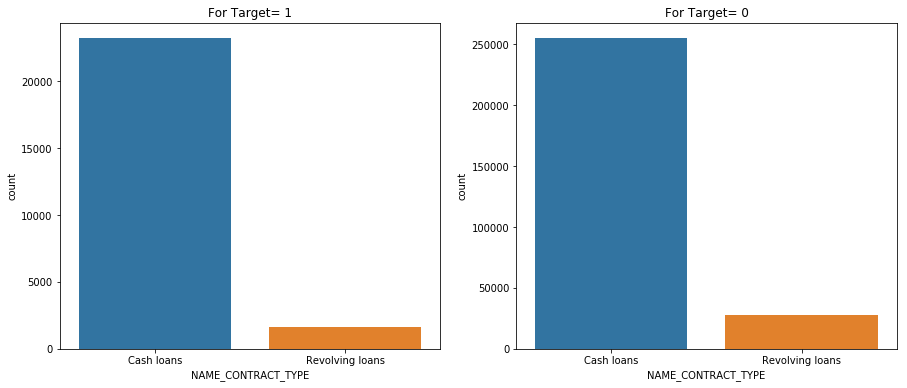

In [47]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.countplot(app_data_tgt_1.NAME_CONTRACT_TYPE)
plt.title('For Target= 1')
plt.subplot(1,2,2)
sns.countplot(app_data_tgt_0.NAME_CONTRACT_TYPE)
plt.title('For Target= 0')
plt.show()

- **Observation:** The contract type with `cash loans` are preferred more irrespective whether the applicants are defaulters or not

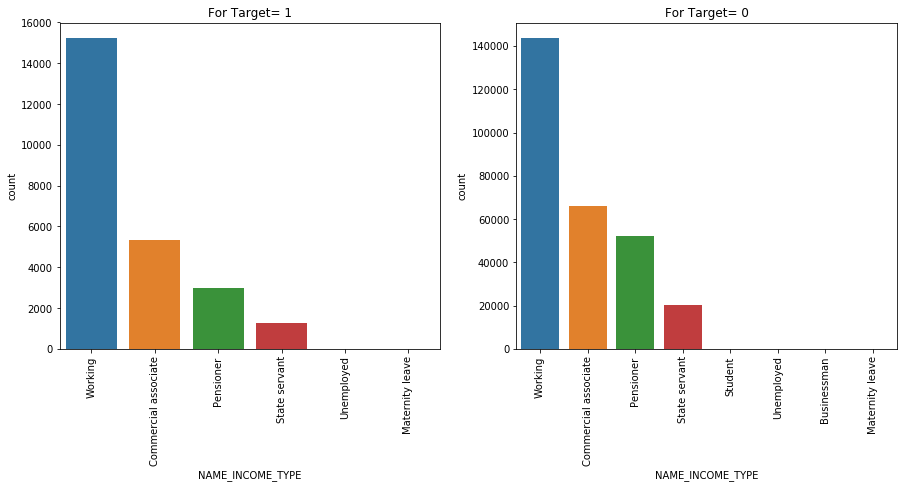

In [48]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.countplot(app_data_tgt_1.NAME_INCOME_TYPE,order=app_data_tgt_1.NAME_INCOME_TYPE.value_counts().index)
plt.title('For Target= 1')
plt.xticks(rotation=90)
plt.subplot(1,2,2)
sns.countplot(app_data_tgt_0.NAME_INCOME_TYPE,order=app_data_tgt_0.NAME_INCOME_TYPE.value_counts().index)
plt.title('For Target= 0')
plt.xticks(rotation=90)
plt.show()

- **Observation:** From the above, we can see that irrespective of the target, `working` class applied the highest for loan

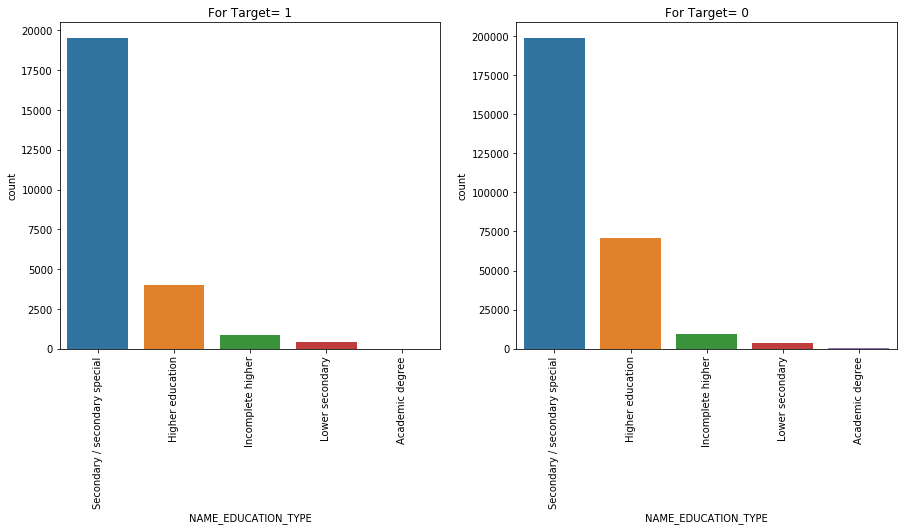

In [49]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.countplot(app_data_tgt_1.NAME_EDUCATION_TYPE,order=app_data_tgt_1.NAME_EDUCATION_TYPE.value_counts().index)
plt.title('For Target= 1')
plt.xticks(rotation=90)
plt.subplot(1,2,2)
sns.countplot(app_data_tgt_0.NAME_EDUCATION_TYPE,order=app_data_tgt_0.NAME_EDUCATION_TYPE.value_counts().index)
plt.title('For Target= 0')
plt.xticks(rotation=90)
plt.show()

- **Observation:** From the above, we can see that irrespective of the target, `Secondary education` class applied the highest for loan

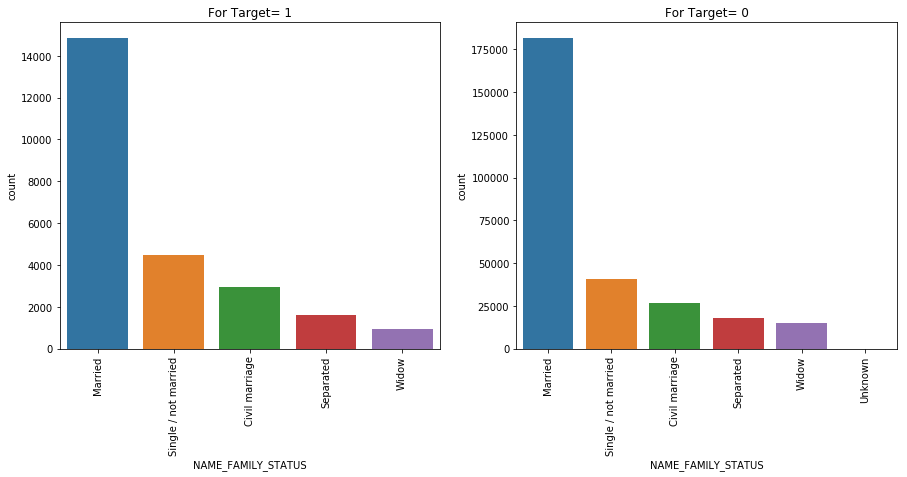

In [50]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.countplot(app_data_tgt_1.NAME_FAMILY_STATUS,order=app_data_tgt_1.NAME_FAMILY_STATUS.value_counts().index)
plt.title('For Target= 1')
plt.xticks(rotation=90)
plt.subplot(1,2,2)
sns.countplot(app_data_tgt_0.NAME_FAMILY_STATUS,order=app_data_tgt_0.NAME_FAMILY_STATUS.value_counts().index)
plt.title('For Target= 0')
plt.xticks(rotation=90)
plt.show()

- **Observation:** From the above, we can see that irrespective of the target, `married` applicants have applied the highest for loan

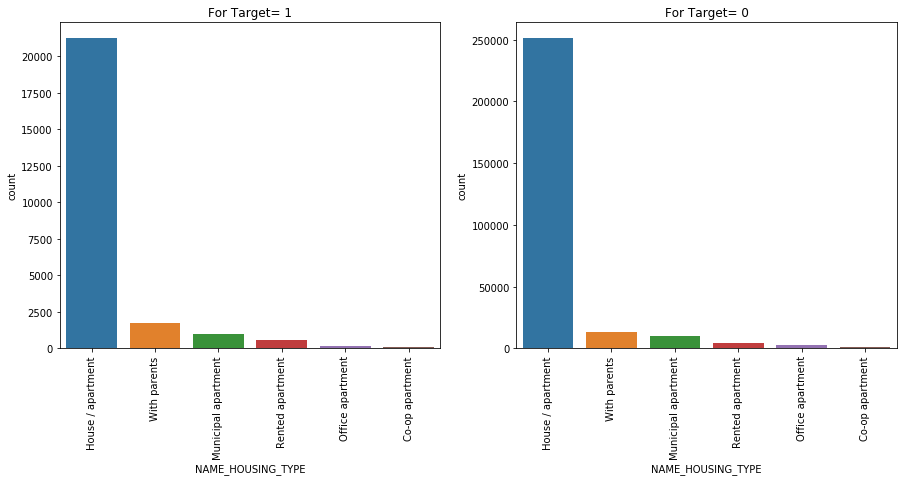

In [51]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.countplot(app_data_tgt_1.NAME_HOUSING_TYPE,order=app_data_tgt_1.NAME_HOUSING_TYPE.value_counts().index)
plt.title('For Target= 1')
plt.xticks(rotation=90)
plt.subplot(1,2,2)
sns.countplot(app_data_tgt_0.NAME_HOUSING_TYPE,order=app_data_tgt_0.NAME_HOUSING_TYPE.value_counts().index)
plt.title('For Target= 0')
plt.xticks(rotation=90)
plt.show()

- **Observation:** From the above, we can see that irrespective of the target, applicants owning a `house/apartment` have applied the highest for loan

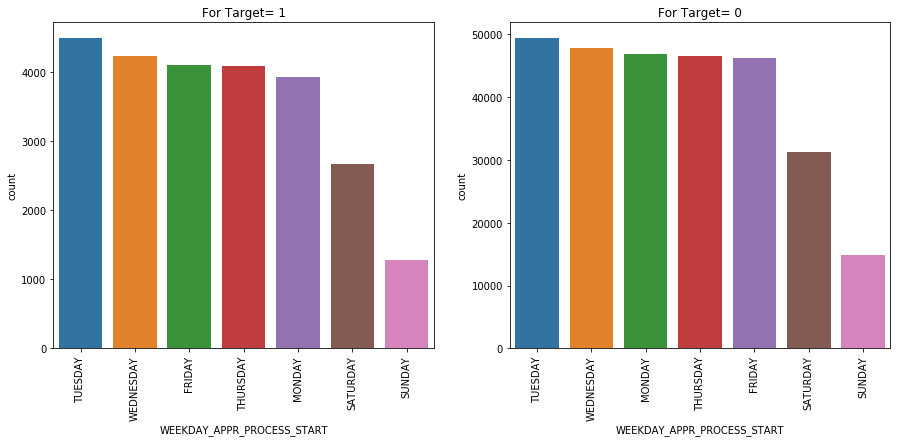

In [52]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.countplot(app_data_tgt_1.WEEKDAY_APPR_PROCESS_START,order=app_data_tgt_1.WEEKDAY_APPR_PROCESS_START.value_counts().index)
plt.title('For Target= 1')
plt.xticks(rotation=90)
plt.subplot(1,2,2)
sns.countplot(app_data_tgt_0.WEEKDAY_APPR_PROCESS_START,order=app_data_tgt_0.WEEKDAY_APPR_PROCESS_START.value_counts().index)
plt.title('For Target= 0')
plt.xticks(rotation=90)
plt.show()

- **Observation:** From the above, we can see that irrespective of the target, most of the application has been started for processing on `Tuesday`

#### - Univariate for numerical variables for both 0 and 1

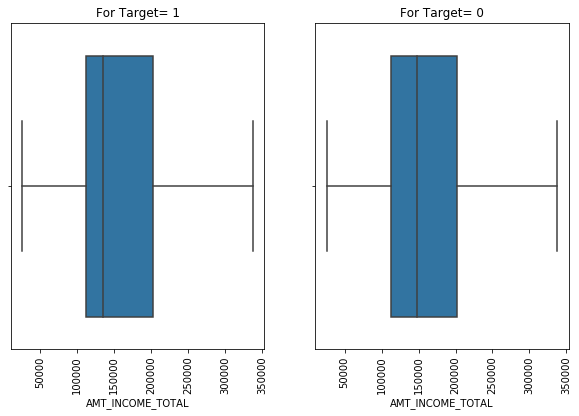

In [53]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
sns.boxplot(app_data_tgt_1.AMT_INCOME_TOTAL)
plt.title('For Target= 1')
plt.xticks(rotation=90)
plt.subplot(1,2,2)
sns.boxplot(app_data_tgt_0.AMT_INCOME_TOTAL)
plt.title('For Target= 0')
plt.xticks(rotation=90)
plt.show()

- **Observation:** From the above, we can see that irrespective of the target, the `income total` of applicants are in same range

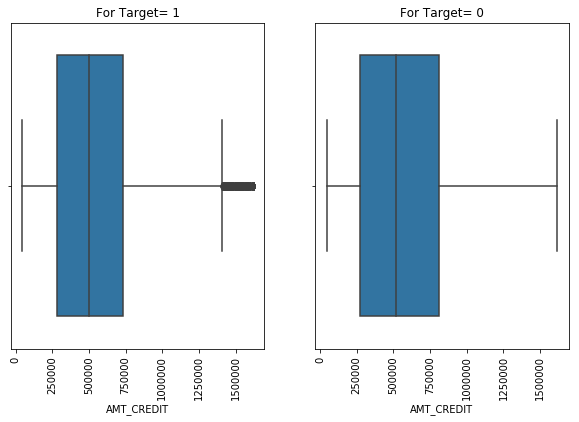

In [54]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
sns.boxplot(app_data_tgt_1.AMT_CREDIT)
plt.title('For Target= 1')
plt.xticks(rotation=90)
plt.subplot(1,2,2)
sns.boxplot(app_data_tgt_0.AMT_CREDIT)
plt.title('For Target= 0')
plt.xticks(rotation=90)
plt.show()

- **Observation:** From the above, we can see that irrespective of the target, the `credit` of applicants are in same range

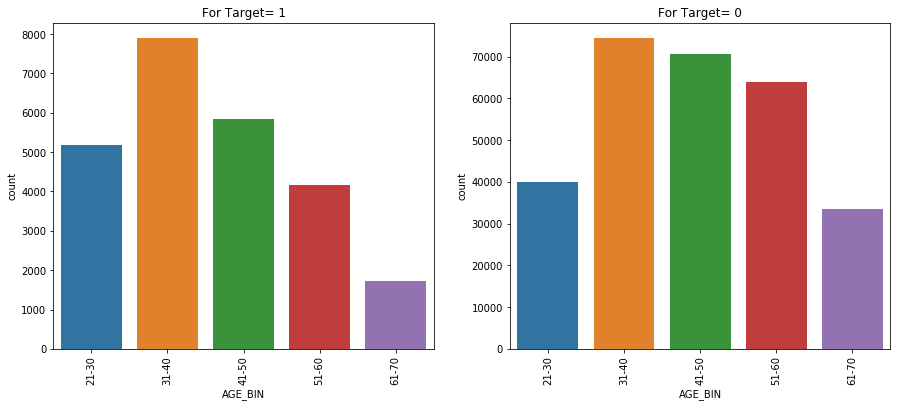

In [55]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.countplot(app_data_tgt_1.AGE_BIN)
plt.title('For Target= 1')
plt.xticks(rotation=90)
plt.subplot(1,2,2)
sns.countplot(app_data_tgt_0.AGE_BIN)
plt.title('For Target= 0')
plt.xticks(rotation=90)
plt.show()

- **Observation:** From the above, we can see that irrespective of the target, the `age group` applying for loan is similar

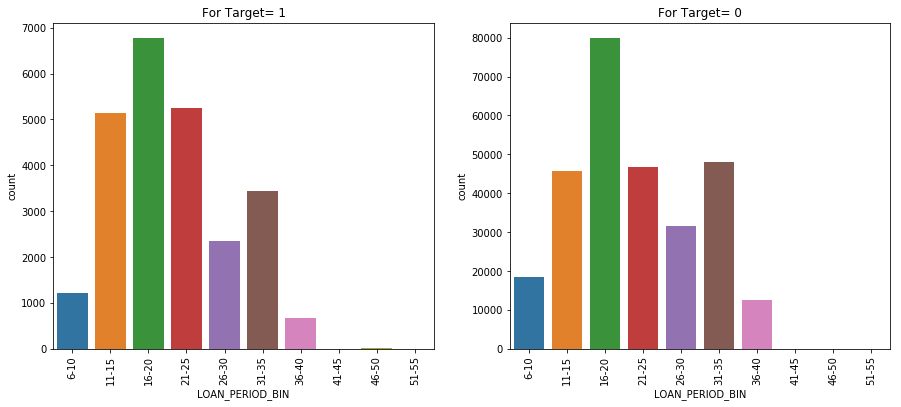

In [56]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.countplot(app_data_tgt_1.LOAN_PERIOD_BIN)
plt.title('For Target= 1')
plt.xticks(rotation=90)
plt.subplot(1,2,2)
sns.countplot(app_data_tgt_0.LOAN_PERIOD_BIN)
plt.title('For Target= 0')
plt.xticks(rotation=90)
plt.show()

- **Observation:** From the above, we can see that irrespective of the target, the `loan period` is similar

### Correlation
#### - Correlation for numerical columns for TARGET=0

In [57]:
round(app_data_tgt_0.corr(),2)

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AGE,LOAN_PERIOD
SK_ID_CURR,1.0,NaN,-0.00,0.00,-0.00,0.00,-0.00,0.00,-0.00,0.00,-0.00,-0.00,0.00,-0.00,-0.00,0.00,0.00,0.00,-0.00,-0.00,-0.00,-0.00,0.00,0.00,0.00,-0.00,-0.00,0.00,0.00,-0.00,0.00,-0.00,0.00,-0.00,0.00,-0.00,-0.00,-0.00,0.00,-0.00,0.00,0.00,-0.00,-0.00,-0.00,0.00,-0.00,0.00,-0.00,0.00,0.00,0.00,0.00,-0.00,0.00,-0.00
TARGET,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CNT_CHILDREN,-0.0,NaN,1.00,0.03,0.00,0.02,-0.00,-0.02,0.34,-0.24,0.19,-0.03,0.00,0.24,0.06,-0.00,-0.03,0.02,0.88,0.02,0.02,-0.01,-0.01,0.01,0.02,0.02,0.07,0.07,-0.02,0.01,-0.00,0.01,-0.00,-0.01,0.00,0.06,-0.00,-0.02,-0.16,-0.00,0.05,-0.00,-0.00,-0.01,0.00,0.00,-0.01,0.00,0.01,0.00,0.00,0.00,0.00,-0.00,-0.34,-0.03
AMT_INCOME_TOTAL,0.0,NaN,0.03,1.00,0.41,0.49,0.42,0.19,0.09,-0.19,0.08,0.03,0.00,0.19,-0.05,-0.01,-0.00,0.10,0.04,-0.23,-0.24,0.09,0.08,0.17,0.16,0.02,0.03,0.03,0.17,-0.03,-0.03,-0.03,-0.03,-0.06,-0.00,-0.02,0.00,0.00,-0.13,0.00,0.19,0.04,0.00,0.00,0.00,0.05,0.04,0.03,0.02,0.01,0.00,0.01,0.00,-0.00,-0.09,0.11
AMT_CREDIT,-0.0,NaN,0.00,0.41,1.00,0.79,0.99,0.10,-0.05,-0.07,0.01,-0.00,0.00,0.07,-0.02,0.02,0.03,0.02,0.07,-0.10,-0.11,0.05,0.02,0.05,0.05,-0.03,-0.02,0.00,0.13,0.00,-0.02,0.00,-0.02,-0.07,0.01,0.11,0.00,-0.01,-0.05,-0.00,0.08,0.02,-0.00,0.02,0.00,0.05,0.04,0.03,0.05,0.01,0.03,0.02,0.03,-0.02,0.05,0.67
AMT_ANNUITY,0.0,NaN,0.02,0.49,0.79,1.00,0.80,0.12,0.01,-0.11,0.04,0.02,0.00,0.11,-0.02,0.02,0.01,0.07,0.08,-0.13,-0.14,0.05,0.04,0.08,0.08,-0.00,0.00,0.01,0.13,-0.01,-0.02,-0.01,-0.02,-0.07,0.00,0.12,-0.00,-0.01,-0.08,-0.00,0.13,0.03,-0.00,-0.01,0.00,0.02,0.03,0.02,0.01,0.00,-0.01,0.01,0.01,-0.02,-0.01,0.15
AMT_GOODS_PRICE,-0.0,NaN,-0.00,0.42,0.99,0.80,1.00,0.10,-0.05,-0.07,0.01,-0.00,0.00,0.07,0.00,0.02,0.04,0.01,0.07,-0.10,-0.11,0.06,0.02,0.05,0.05,-0.03,-0.02,0.00,0.13,0.00,-0.02,0.00,-0.02,-0.08,0.01,0.09,0.00,-0.01,-0.05,0.00,0.08,0.02,-0.00,0.02,0.00,0.04,0.04,0.03,0.05,0.01,0.02,0.02,0.03,-0.02,0.05,0.65
REGION_POPULATION_RELATIVE,0.0,NaN,-0.02,0.19,0.10,0.12,0.10,1.00,-0.03,-0.01,-0.05,-0.00,0.00,0.01,-0.01,-0.01,0.09,0.04,-0.02,-0.54,-0.54,0.17,0.00,0.06,0.08,-0.05,-0.04,-0.01,0.20,-0.01,0.01,-0.01,0.00,-0.04,-0.00,-0.09,0.01,0.02,-0.00,0.00,0.09,0.04,0.00,0.02,-0.00,0.03,0.03,0.01,0.01,0.01,0.01,0.00,-0.00,0.00,0.03,0.02
DAYS_BIRTH,-0.0,NaN,0.34,0.09,-0.05,0.01,-0.05,-0.03,1.00,-0.62,0.33,0.27,-0.00,0.62,0.17,-0.02,-0.04,0.09,0.29,0.00,0.00,0.10,0.07,0.10,0.07,0.18,0.24,0.16,-0.08,0.01,-0.00,0.01,-0.00,0.08,0.00,0.10,-0.00,0.02,-0.41,0.00,0.12,0.02,-0.00,0.05,0.00,0.03,0.03,0.01,0.03,0.01,0.05,0.00,0.01,0.03,-1.00,-0.10
DAYS_EMPLOYED,0.0,NaN,-0.24,-0.19,-0.07,-0.11,-0.07,-0.01,-0.62,1.00,-0.21,-0.27,0.00,-1.00,-0.24,0.01,0.01,-0.06,-0.24,0.04,0.04,-0.09,-0.04,-0.11,-0.10,-0.09,-0.25,-0.22,-0.03,0.01,0.02,0.01,0.02,0.03,-0.00,-0.25,0.00,-0.02,0.60,-0.00,-0.12,-0.02,-0.00,-0.03,-0.00,-0.03,-0.02,-0.01,-0.04

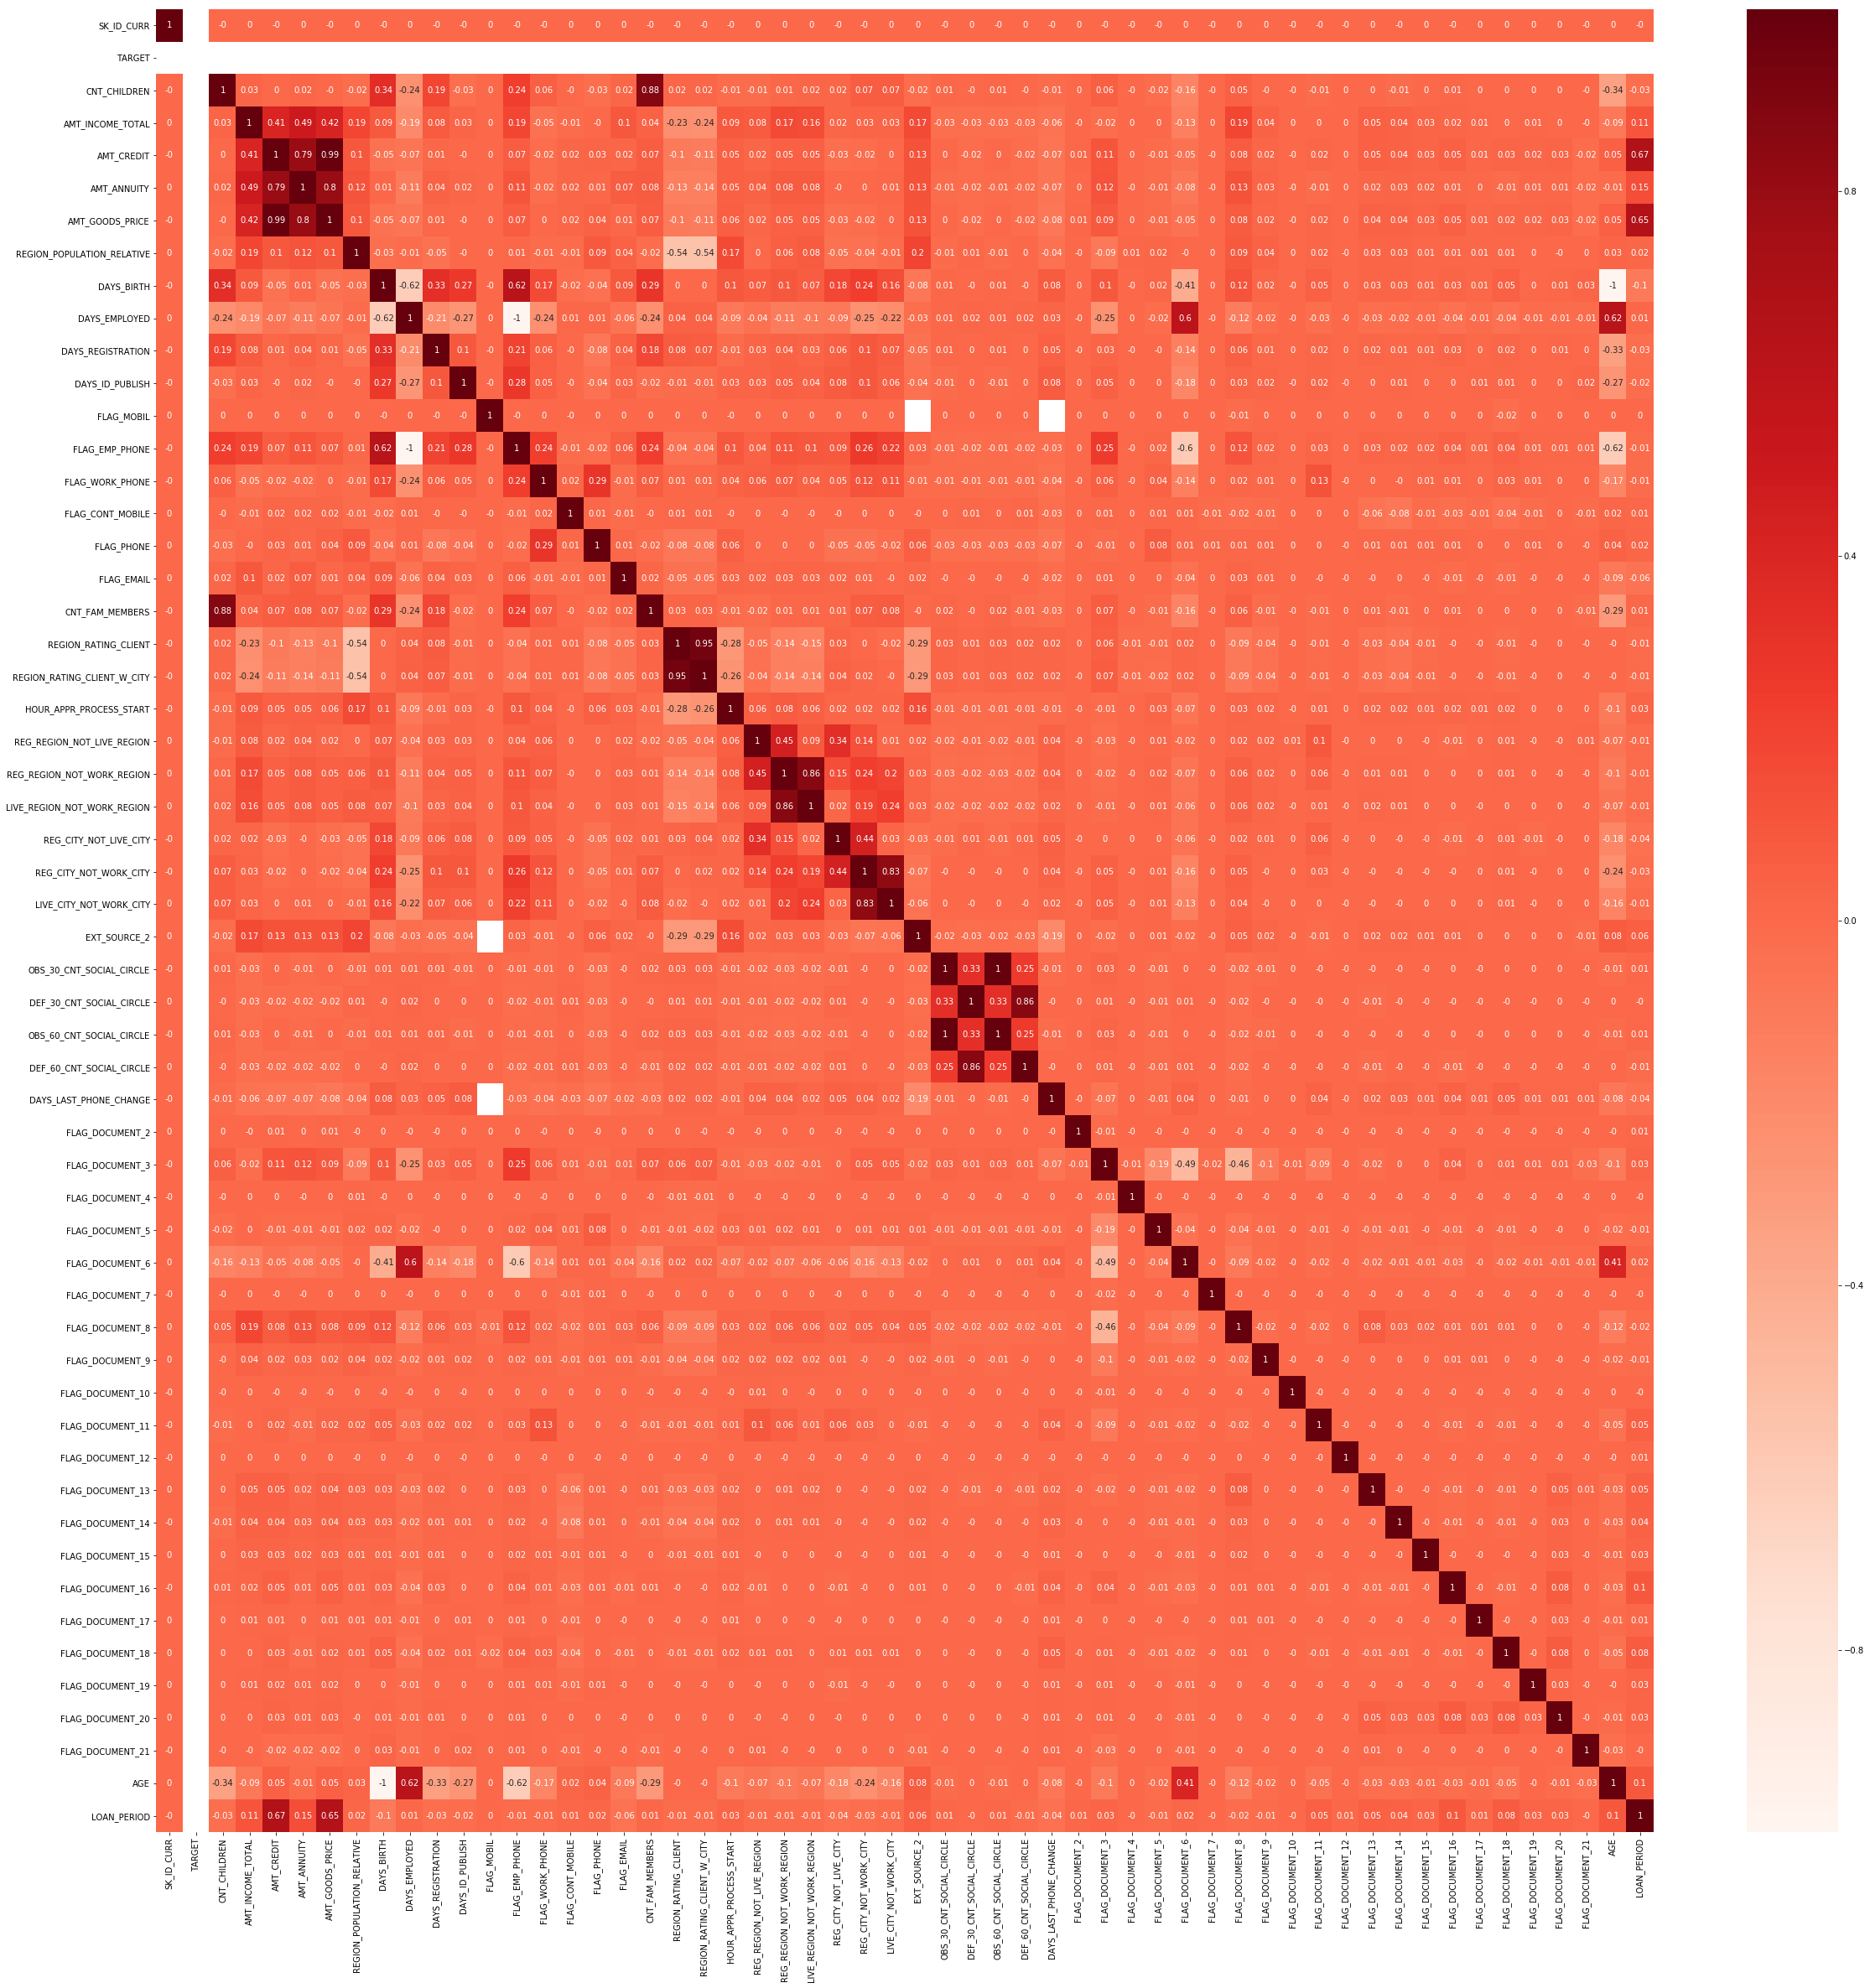

In [58]:
plt.figure(figsize=(40,40))
sns.heatmap(round(app_data_tgt_0.corr(),2), cmap='Reds', annot=True)
plt.show()

#### - Correlation for numerical columns for TARGET=1

In [59]:
round(app_data_tgt_1.corr(),2)

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AGE,LOAN_PERIOD
SK_ID_CURR,1.00,NaN,-0.01,0.00,-0.00,-0.01,-0.00,0.01,-0.00,-0.01,0.01,-0.00,NaN,0.01,0.00,-0.00,0.02,0.00,-0.00,-0.01,-0.00,0.01,-0.00,0.00,0.00,0.01,0.00,-0.00,0.01,-0.01,-0.01,-0.01,-0.01,0.00,-0.00,-0.00,NaN,0.00,0.00,0.00,0.00,-0.01,NaN,-0.00,NaN,-0.00,0.00,0.01,-0.00,-0.01,-0.01,-0.01,0.00,0.01,0.00,0.00
TARGET,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CNT_CHILDREN,-0.01,NaN,1.00,-0.00,-0.00,0.03,-0.01,-0.03,0.26,-0.19,0.15,-0.03,NaN,0.19,0.05,0.00,-0.02,0.01,0.89,0.04,0.04,-0.02,-0.02,-0.02,-0.01,-0.00,0.05,0.05,-0.01,0.03,0.00,0.03,-0.01,0.01,-0.01,0.06,NaN,-0.02,-0.13,-0.00,0.03,0.00,NaN,-0.01,NaN,0.00,-0.00,0.00,-0.00,-0.01,0.00,-0.00,-0.00,0.00,-0.26,-0.04
AMT_INCOME_TOTAL,0.00,NaN,-0.00,1.00,0.36,0.44,0.36,0.12,0.00,-0.13,0.04,-0.00,NaN,0.13,-0.09,-0.00,-0.01,0.10,0.01,-0.17,-0.19,0.08,0.08,0.16,0.15,0.01,0.02,0.02,0.15,-0.00,-0.02,-0.00,-0.02,-0.09,0.00,-0.00,NaN,-0.00,-0.10,-0.00,0.16,0.04,NaN,0.00,NaN,0.03,0.03,0.01,0.02,-0.00,-0.02,-0.00,-0.00,-0.00,-0.00,0.07
AMT_CREDIT,-0.00,NaN,-0.00,0.36,1.00,0.76,0.98,0.07,-0.14,0.00,-0.03,-0.05,NaN,-0.00,-0.06,0.03,0.01,0.01,0.05,-0.06,-0.07,0.03,0.02,0.03,0.03,-0.03,-0.04,-0.02,0.12,0.02,-0.03,0.02,-0.03,-0.11,0.03,0.07,NaN,-0.01,-0.00,-0.01,0.06,0.02,NaN,0.02,NaN,0.01,0.05,0.02,0.04,-0.00,0.01,0.01,0.02,-0.02,0.14,0.68
AMT_ANNUITY,-0.01,NaN,0.03,0.44,0.76,1.00,0.76,0.07,-0.01,-0.09,0.04,-0.02,NaN,0.09,-0.05,0.04,-0.01,0.08,0.08,-0.07,-0.09,0.03,0.03,0.07,0.06,-0.01,0.00,0.01,0.12,0.01,-0.02,0.01,-0.03,-0.08,0.02,0.11,NaN,-0.01,-0.07,-0.02,0.12,0.03,NaN,-0.00,NaN,-0.00,0.03,0.01,-0.00,-0.01,-0.04,-0.00,-0.00,-0.03,0.01,0.10
AMT_GOODS_PRICE,-0.00,NaN,-0.01,0.36,0.98,0.76,1.00,0.08,-0.14,0.00,-0.03,-0.06,NaN,-0.01,-0.04,0.03,0.03,0.01,0.05,-0.07,-0.08,0.04,0.02,0.04,0.04,-0.03,-0.04,-0.02,0.13,0.02,-0.02,0.02,-0.03,-0.12,0.03,0.05,NaN,-0.00,-0.00,-0.01,0.05,0.02,NaN,0.02,NaN,0.01,0.05,0.02,0.03,0.00,0.00,0.01,0.02,-0.02,0.14,0.65
REGION_POPULATION_RELATIVE,0.01,NaN,-0.03,0.12,0.07,0.07,0.08,1.00,-0.05,0.02,-0.06,-0.02,NaN,-0.02,-0.02,-0.00,0.07,0.03,-0.03,-0.44,-0.45,0.14,-0.02,0.02,0.05,-0.06,-0.05,-0.02,0.17,0.01,0.03,0.01,0.02,-0.06,-0.01,-0.04,NaN,0.00,0.01,-0.01,0.05,0.02,NaN,0.03,NaN,0.03,0.04,0.01,0.00,-0.00,0.01,-0.00,0.00,0.01,0.05,0.04
DAYS_BIRTH,-0.00,NaN,0.26,0.00,-0.14,-0.01,-0.14,-0.05,1.00,-0.58,0.29,0.25,NaN,0.58,0.16,-0.01,-0.03,0.06,0.20,0.03,0.03,0.06,0.05,0.07,0.05,0.16,0.22,0.12,-0.11,-0.01,0.00,-0.01,0.00,0.11,-0.01,0.13,NaN,0.01,-0.39,0.00,0.06,0.01,NaN,0.04,NaN,0.01,0.01,0.01,0.00,-0.00,0.03,0.00,0.00,0.03,-1.00,-0.22
DAYS_EMPLOYED,-0.01,NaN,-0.19,-0.13,0.00,-0.09,0.00,0.02,-0.58,1.00,-0.19,-0.23,NaN,-1.00,-0.21,0.01,0.01,-0.04,-0.19,0.00,0.00,-0.06,-0.03,-0.09,-0.08,-0.08,-0.24,-0.20,-0.00,-0.01,0.00,-0.01,0.01,0.00,-0.00,-0.27,NaN,-0.02,0.62,-0.00,-0.10,-0.02,NaN,-0.02,NaN,-0.01,-0.01,-0.01,-0.03,-0.00,-0.03

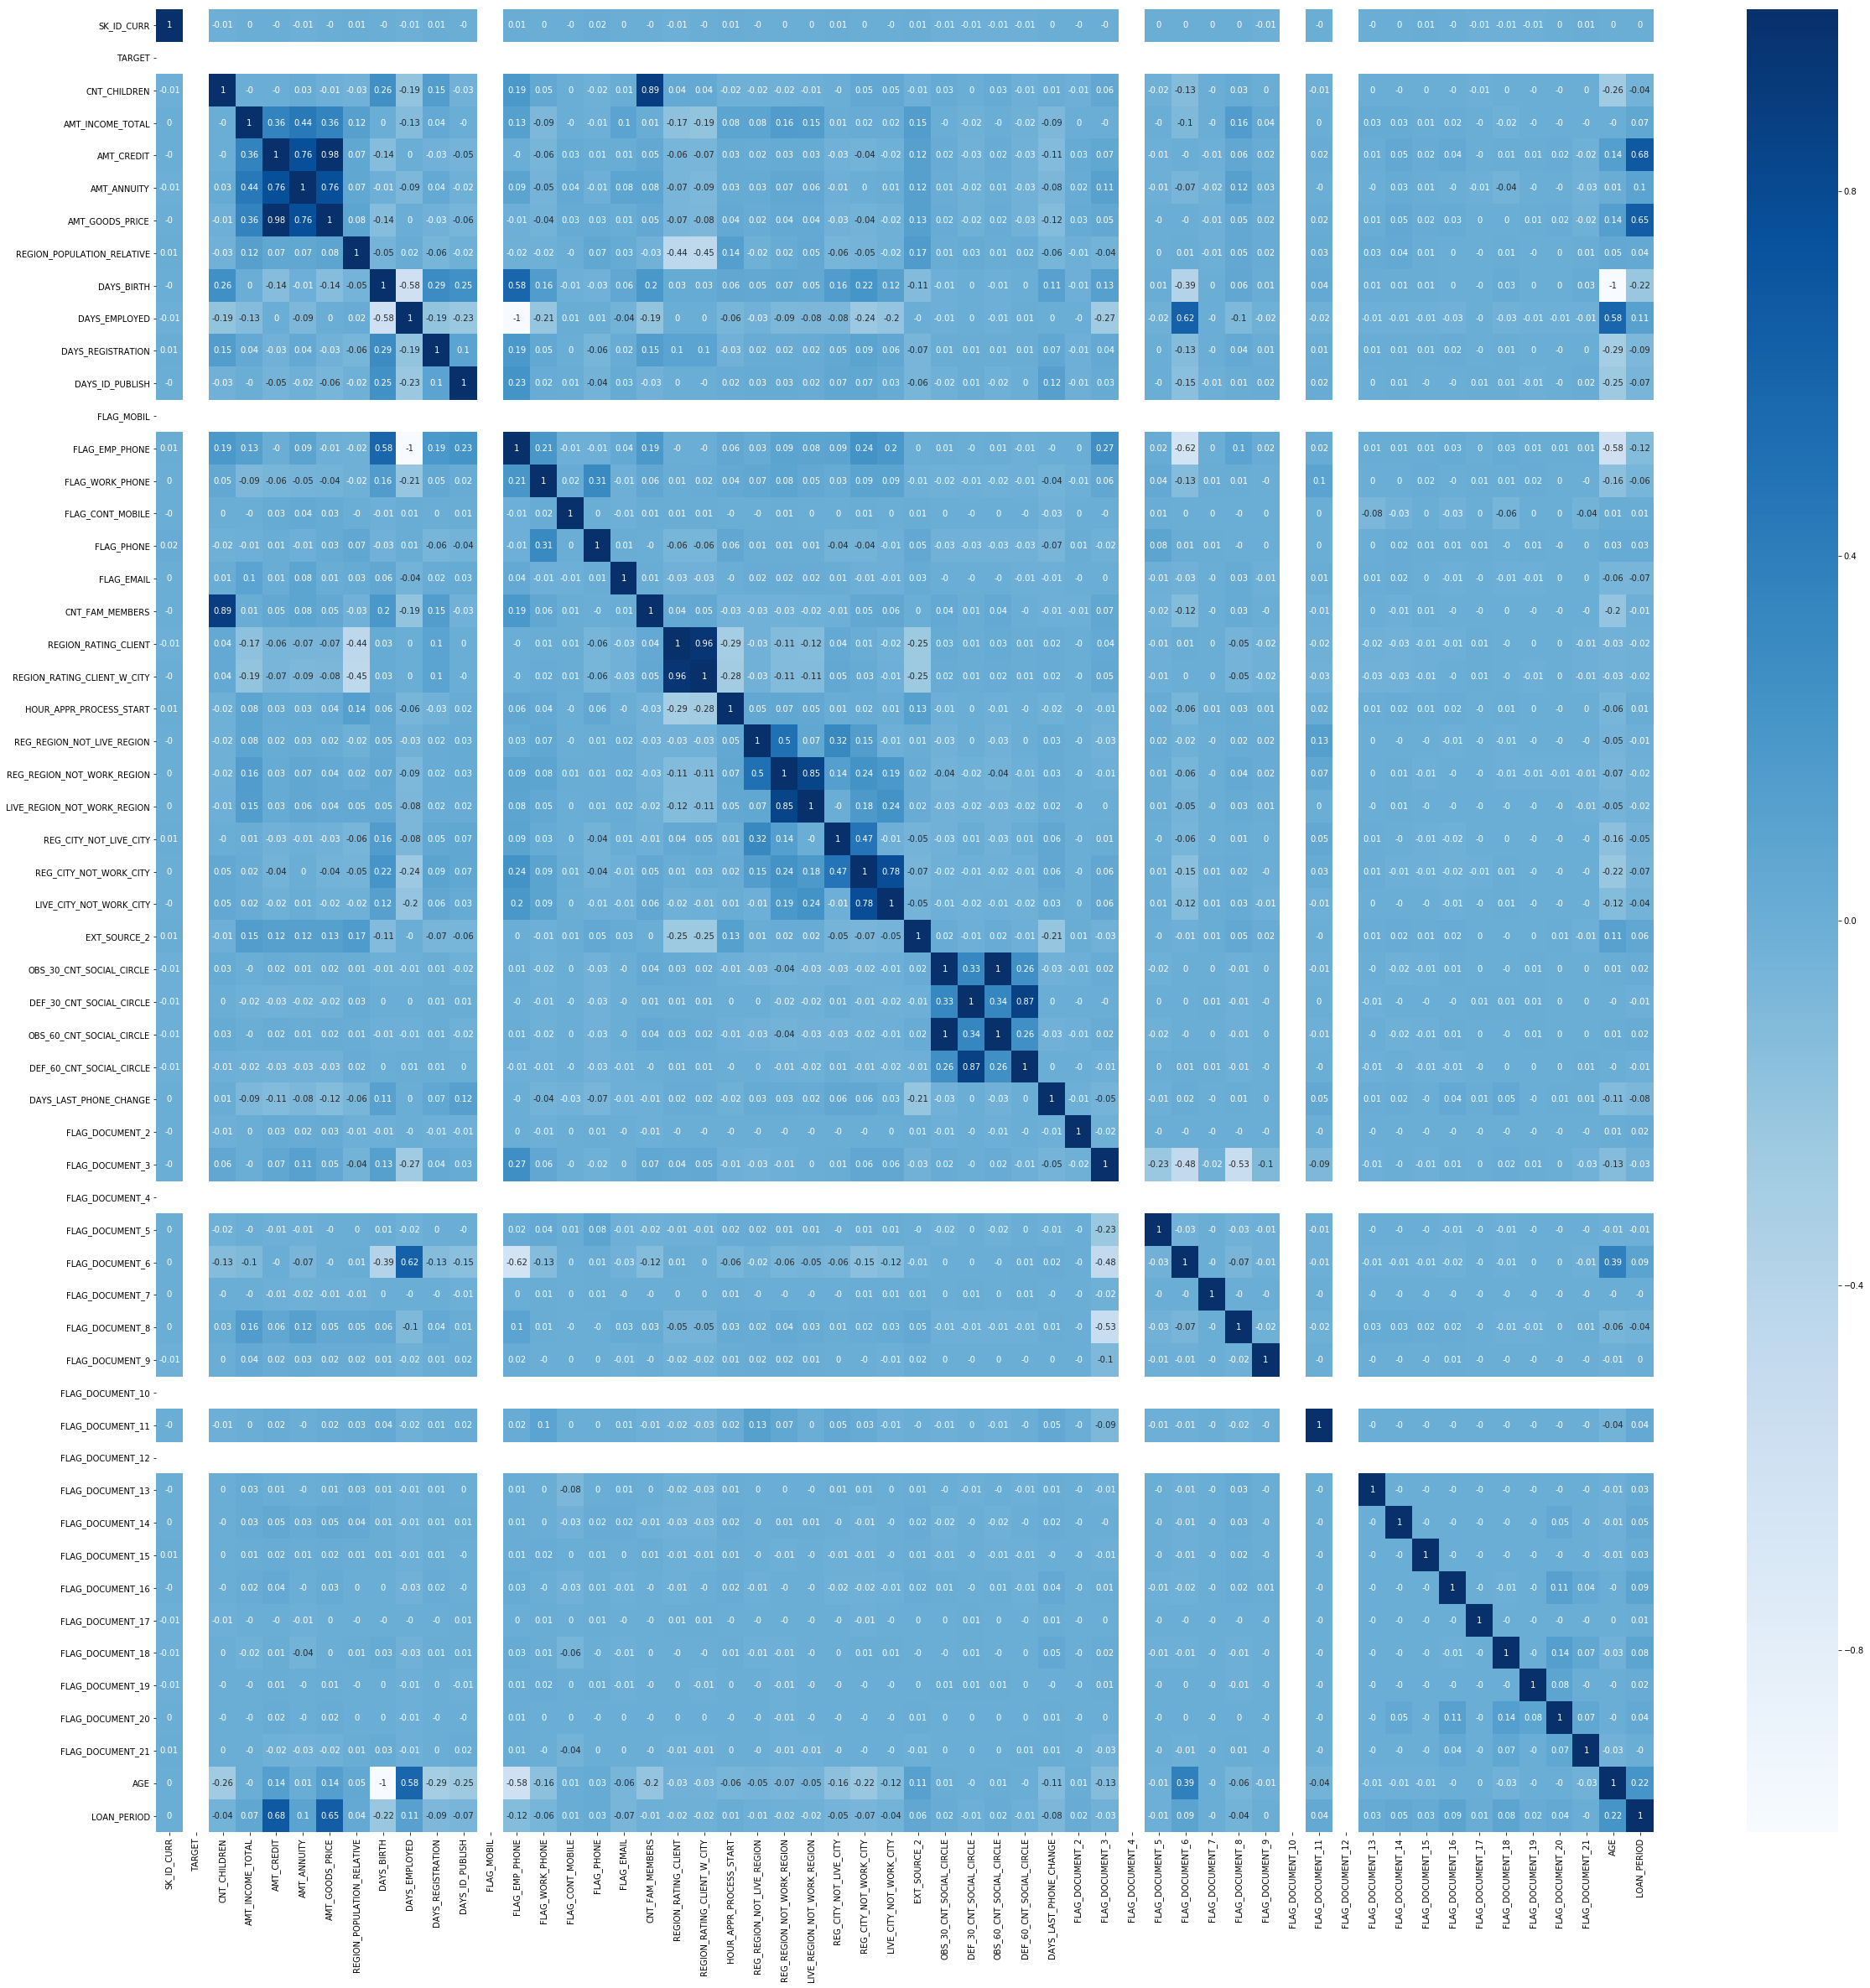

In [60]:
plt.figure(figsize=(40,40))
sns.heatmap(round(app_data_tgt_1.corr(),2), cmap='Blues', annot=True)
plt.show()

**Observation:** Both 0 and 1 have same variables with highest correlation
- AMT_CREDIT, AMT_ANNUITY and AMT_GOODS_PRICE are highly correlated to each other
- LOAN_PERIOD, AMT_CREDIT and AMT_GOODS_PRICE are correlated to each other

### Bivariate Analysis
#### - Taking AMT_CREDIT, AMT_ANNUITY columns to analyse for TARGET=0

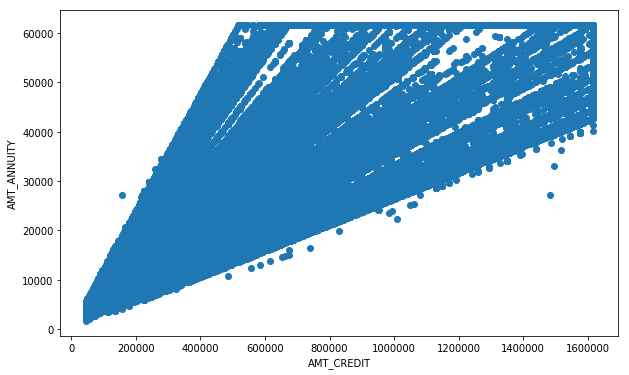

In [61]:
plt.figure(figsize=(10,6))
plt.scatter(x='AMT_CREDIT', y='AMT_ANNUITY', data=app_data_tgt_0)
plt.xlabel('AMT_CREDIT')
plt.ylabel('AMT_ANNUITY')
plt.show()

#### - Taking AMT_CREDIT, AMT_ANNUITY columns to analyse for TARGET=1

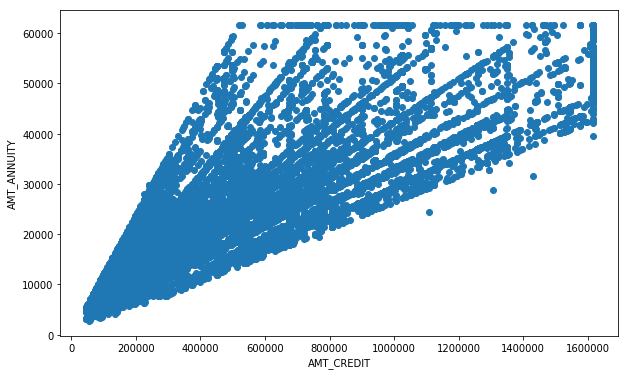

In [62]:
plt.figure(figsize=(10,6))
plt.scatter(x='AMT_CREDIT', y='AMT_ANNUITY', data=app_data_tgt_1)
plt.xlabel('AMT_CREDIT')
plt.ylabel('AMT_ANNUITY')
plt.show()

- **Observation:** From the above, we can see for both 0 and 1 `credit` and `annuity` varies in similar fashion

#### - Taking AMT_CREDIT, AMT_GOODS_PRICE columns to analyse for TARGET=0

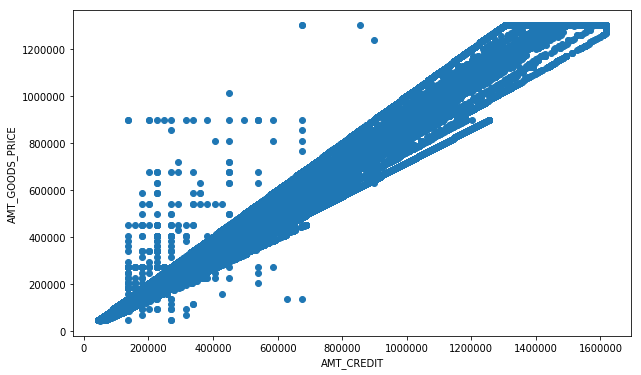

In [63]:
plt.figure(figsize=(10,6))
plt.scatter(x='AMT_CREDIT', y='AMT_GOODS_PRICE', data=app_data_tgt_0)
plt.xlabel('AMT_CREDIT')
plt.ylabel('AMT_GOODS_PRICE')
plt.show()

#### - Taking AMT_CREDIT, AMT_GOODS_PRICE columns to analyse for TARGET=1

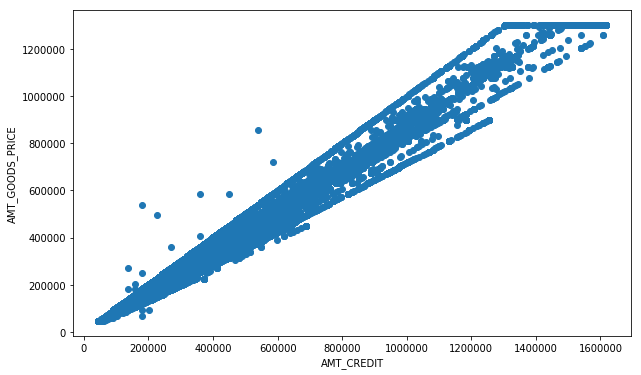

In [64]:
plt.figure(figsize=(10,6))
plt.scatter(x='AMT_CREDIT', y='AMT_GOODS_PRICE', data=app_data_tgt_1)
plt.xlabel('AMT_CREDIT')
plt.ylabel('AMT_GOODS_PRICE')
plt.show()

- **Observation:** From the above, we can see for both 0 and 1 `credit` and `goods price` varies in similar fashion

#### - Taking AMT_GOODS_PRICE, AMT_ANNUITY columns to analyse for TARGET=0

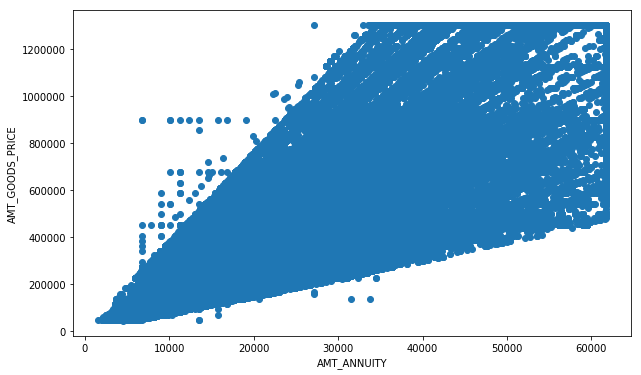

In [65]:
plt.figure(figsize=(10,6))
plt.scatter(x='AMT_ANNUITY', y='AMT_GOODS_PRICE', data=app_data_tgt_0)
plt.xlabel('AMT_ANNUITY')
plt.ylabel('AMT_GOODS_PRICE')
plt.show()

#### - Taking AMT_GOODS_PRICE, AMT_ANNUITY columns to analyse for TARGET=1

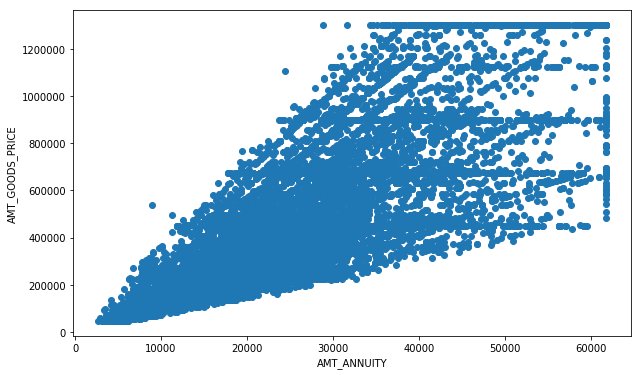

In [66]:
plt.figure(figsize=(10,6))
plt.scatter(x='AMT_ANNUITY', y='AMT_GOODS_PRICE', data=app_data_tgt_1)
plt.xlabel('AMT_ANNUITY')
plt.ylabel('AMT_GOODS_PRICE')
plt.show()

- **Observation:** From the above, we can see for both 0 and 1 `annuity` and `goods price` varies in similar fashion

#### - Taking AMT_GOODS_PRICE, LOAN_PERIOD columns to analyse for TARGET=0

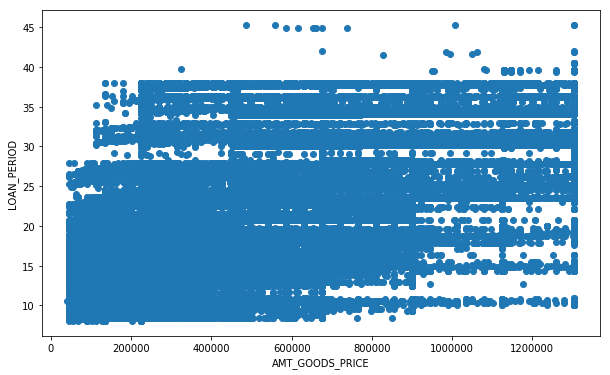

In [67]:
plt.figure(figsize=(10,6))
plt.scatter(x='AMT_GOODS_PRICE', y='LOAN_PERIOD', data=app_data_tgt_0)
plt.xlabel('AMT_GOODS_PRICE')
plt.ylabel('LOAN_PERIOD')
plt.show()

#### - Taking AMT_GOODS_PRICE, LOAN_PERIOD columns to analyse for TARGET=1

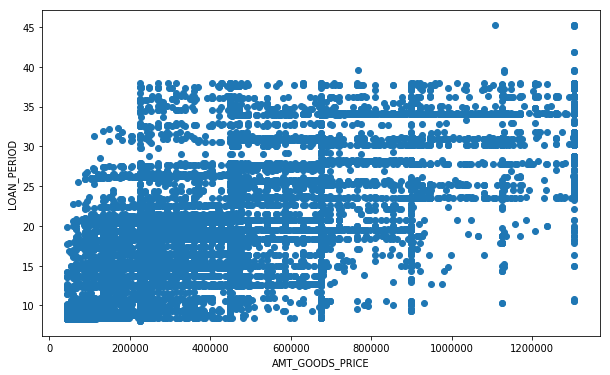

In [68]:
plt.figure(figsize=(10,6))
plt.scatter(x='AMT_GOODS_PRICE', y='LOAN_PERIOD', data=app_data_tgt_1)
plt.xlabel('AMT_GOODS_PRICE')
plt.ylabel('LOAN_PERIOD')
plt.show()

- **Observation:** From the above, we can see for both 0 and 1 `loan period` and `goods price` varies in similar fashion

#### - Taking AMT_CREDIT, LOAN_PERIOD columns to analyse for TARGET=0

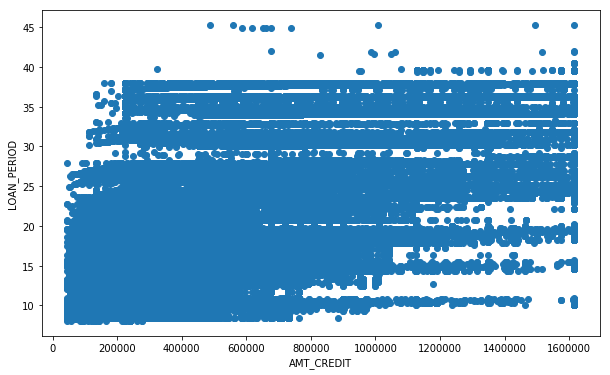

In [69]:
plt.figure(figsize=(10,6))
plt.scatter(x='AMT_CREDIT', y='LOAN_PERIOD', data=app_data_tgt_0)
plt.xlabel('AMT_CREDIT')
plt.ylabel('LOAN_PERIOD')
plt.show()

#### - Taking AMT_CREDIT, LOAN_PERIOD columns to analyse for TARGET=1

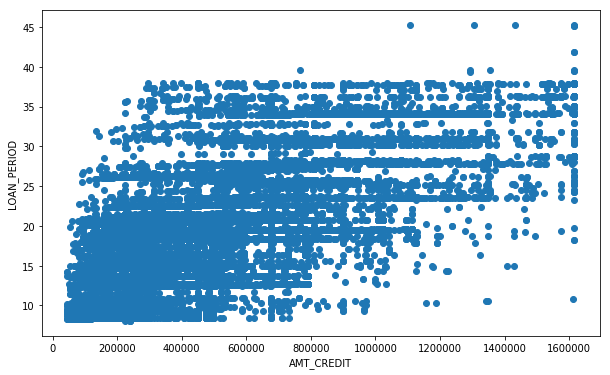

In [70]:
plt.figure(figsize=(10,6))
plt.scatter(x='AMT_CREDIT', y='LOAN_PERIOD', data=app_data_tgt_1)
plt.xlabel('AMT_CREDIT')
plt.ylabel('LOAN_PERIOD')
plt.show()

- **Observation:** From the above, we can see for both 0 and 1 `loan period` and `credit` varies in similar fashion

### Analysing previous and current data
#### - Reading the previous_application.csv

In [71]:
previous_application = pd.read_csv('previous_application.csv')
previous_application.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


#### - Shape of the previous data

In [72]:
previous_application.shape

(1670214, 37)

#### - Information about the previous data

In [73]:
previous_application.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
SK_ID_PREV                     1670214 non-null int64
SK_ID_CURR                     1670214 non-null int64
NAME_CONTRACT_TYPE             1670214 non-null object
AMT_ANNUITY                    1297979 non-null float64
AMT_APPLICATION                1670214 non-null float64
AMT_CREDIT                     1670213 non-null float64
AMT_DOWN_PAYMENT               774370 non-null float64
AMT_GOODS_PRICE                1284699 non-null float64
WEEKDAY_APPR_PROCESS_START     1670214 non-null object
HOUR_APPR_PROCESS_START        1670214 non-null int64
FLAG_LAST_APPL_PER_CONTRACT    1670214 non-null object
NFLAG_LAST_APPL_IN_DAY         1670214 non-null int64
RATE_DOWN_PAYMENT              774370 non-null float64
RATE_INTEREST_PRIMARY          5951 non-null float64
RATE_INTEREST_PRIVILEGED       5951 non-null float64
NAME_CASH_LOAN_PURPOSE         1670214 non-null object
NAME_CONTRA

#### - Statistical description of the previous data

In [74]:
previous_application.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.670214e+06,1.670214e+06,1.297979e+06,1.670214e+06,1.670213e+06,7.743700e+05,1.284699e+06,1.670214e+06,1.670214e+06,774370.000000,5951.000000,5951.000000,1.670214e+06,1.670214e+06,1.297984e+06,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000
mean,1.923089e+06,2.783572e+05,1.595512e+04,1.752339e+05,1.961140e+05,6.697402e+03,2.278473e+05,1.248418e+01,9.964675e-01,0.079637,0.188357,0.773503,-8.806797e+02,3.139511e+02,1.605408e+01,342209.855039,13826.269337,33767.774054,76582.403064,81992.343838,0.332570
std,5.325980e+05,1.028148e+05,1.478214e+04,2.927798e+05,3.185746e+05,2.092150e+04,3.153966e+05,3.334028e+00,5.932963e-02,0.107823,0.087671,0.100879,7.790997e+02,7.127443e+03,1.456729e+01,88916.115834,72444.869708,106857.034789,149647.415123,153303.516729,0.471134
min,1.000001e+06,1.000010e+05,0.000000e+00,0.000000e+00,0.000000e+00,-9.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-0.000015,0.034781,0.373150,-2.922000e+03,-1.000000e+00,0.000000e+00,-2922.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000,0.000000
25%,1.461857e+06,1.893290e+05,6.321780e+03,1.872000e+04,2.416050e+04,0.000000e+00,5.084100e+04,1.000000e+01,1.000000e+00,0.000000,0.160716,0.715645,-1.300000e+03,-1.000000e+00,6.000000e+00,365243.000000,-1628.000000,-1242.000000,-1314.000000,-1270.000000,0.000000
50%,1.923110e+06,2.787145e+05,1.125000e+04,7.104600e+04,8.054100e+04,1.638000e+03,1.123200e+05,1.200000e+01,1.000000e+00,0.051605,0.189122,0.835095,-5.810000e+02,3.000000e+00,1.200000e+01,365243.000000,-831.000000,-361.000000,-537.000000,-499.000000,0.000000
75%,2.384280e+06,3.675140e+05,2.065842e+04,1.803600e+05,2.164185e+05,7.740000e+03,2.340000e+05,1.500000e+01,1.000000e+00,0.108909,0.193330,0.852537,-2.800000e+02,8.200000e+01,2.400000e+01,365243.000000,-411.000000,129.000000,-74.000000,-44.000000,1.000000
max,2.845382e+06,4.562550e+05,4.180581e+05,6.905160e+06,6.905160e+06,3.060045e+06,6.905160e+06,2.300000e+01,1.000000e+00,1.000000,1.000000,1.000000,-1.000000e+00,4.000000e+06,8.400000e+01,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


#### - Merging the previous data and current data

In [75]:
merged_data=previous_application.merge(clean_app_data,how='outer',on='SK_ID_CURR')
merged_data.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE_x,AMT_ANNUITY_x,AMT_APPLICATION,AMT_CREDIT_x,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE_x,WEEKDAY_APPR_PROCESS_START_x,HOUR_APPR_PROCESS_START_x,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE_x,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL,TARGET,NAME_CONTRACT_TYPE_y,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_y,AMT_ANNUITY_y,AMT_GOODS_PRICE_y,NAME_TYPE_SUITE_y,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START_y,HOUR_APPR_PROCESS_START_y,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AGE,LOAN_PERIOD,AGE_BIN,LOAN_PERIOD_BIN
0,2030495.0,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15.0,Y,1.0,0.000000,0.182832,0.867336,XAP,Approved,-73.0,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35.0,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0,0.0,Cash loans,F,N,Y,1.0,225000.0,533668.5,25803.0,477000.0,Unaccompanied,State servant,Incomplete higher,Married,House / apartment,0.046220,-14443.0,-7392.0,-8447.0,-4120.0,1.0,1.0,0.0,1.0,1.0,0.0,3.0,1.0,1.0,TUESDAY,17.0,0.0,1.0,1.0,0.0,0.0,0.0,Military,0.683797,3.0,0.0,3.0,0.0,-548.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39.54,20.6824,31-40,21-25
1,1696966.0,271877,Consumer loans,68258.655,1800000.0,1754721.0,180000.0,1800000.0,SATURDAY,18.0,Y,1.0,0.101325,NaN,NaN,XAP,Refused,-472.0,Cash through the bank,SCO,NaN,Repeater,Clothing and Accessories,POS,XNA,Regional / Local,55.0,Furniture,36.0,low_normal,POS industry with interest,NaN,NaN,NaN,NaN,NaN,NaN,0.0,Cash loans,F,N,Y,1.0,225000.0,533668.5,25803.0,477000.0,Unaccompanied,State servant,Incomplete higher,Married,House / apartment,0.046220,-14443.0,-7392.0,-8447.0,-4120.0,1.0,1.0,0.0,1.0,1.0,0.0,3.0,1.0,1.0,TUESDAY,17.0,0.0,1.0,1.0,0.0,0.0,0.0,Military,0.683797,3.0,0.0,3.0,0.0,-548.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39.54,20.6824,31-40,21-25
2,2154916.0,271877,Consumer loans,12417.390,108400.5,119848.5,0.0,108400.5,SUNDAY,14.0,Y,1.0,0.000000,NaN,NaN,XAP,Approved,-548.0,Cash through the bank,XAP,NaN,New,Furniture,POS,XNA,Stone,196.0,Furniture,12.0,middle,POS industry with interest,365243.0,-512.0,-182.0,-392.0,-387.0,0.0,0.0,Cash loans,F,N,Y,1.0,225000.0,533668.5,25803.0,477000.0,Unaccompanied,State servant,Incomplete higher,Married,House / apartment,0.046220,-14443.0,-7392.0,-8447.0,-4120.0,1.0,1.0,0.0,1.0,1.0,0.0,3.0,1.0,1.0,TUESDAY,17.0,0.0,1.0,1.0,0.0,0.0,0.0,Military,0.683797,3.0,0.0,3.0,0.0,-548.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39.54,20.6824,31-40,21-25
3,2802425.0,108129,Cash loans,2518

#### - Shape of the merged data set

In [76]:
merged_data.shape

(1686668, 105)

#### - Univarate analysis on selected columns

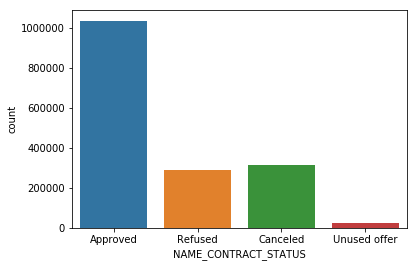

In [77]:
sns.countplot(merged_data.NAME_CONTRACT_STATUS)
plt.show()

- **Observation:** Most of the previous application are in `approved` status

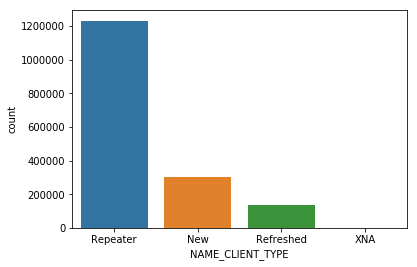

In [78]:
sns.countplot(merged_data.NAME_CLIENT_TYPE)
plt.show()

- **Observation:** Most of the previous application are of `repeaters`

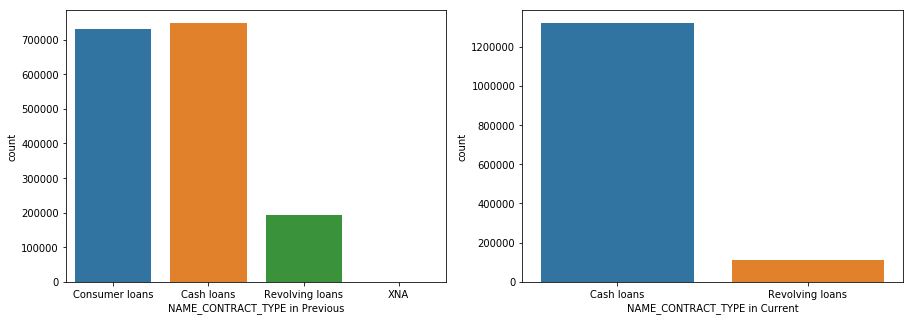

In [79]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.countplot(merged_data.NAME_CONTRACT_TYPE_x)
plt.xlabel('NAME_CONTRACT_TYPE in Previous')
plt.subplot(1,2,2)
sns.countplot(merged_data.NAME_CONTRACT_TYPE_y)
plt.xlabel('NAME_CONTRACT_TYPE in Current')
plt.show()

- **Observation:** In both previous and current data, `cash loans` are high

#### - Correlation of merged data

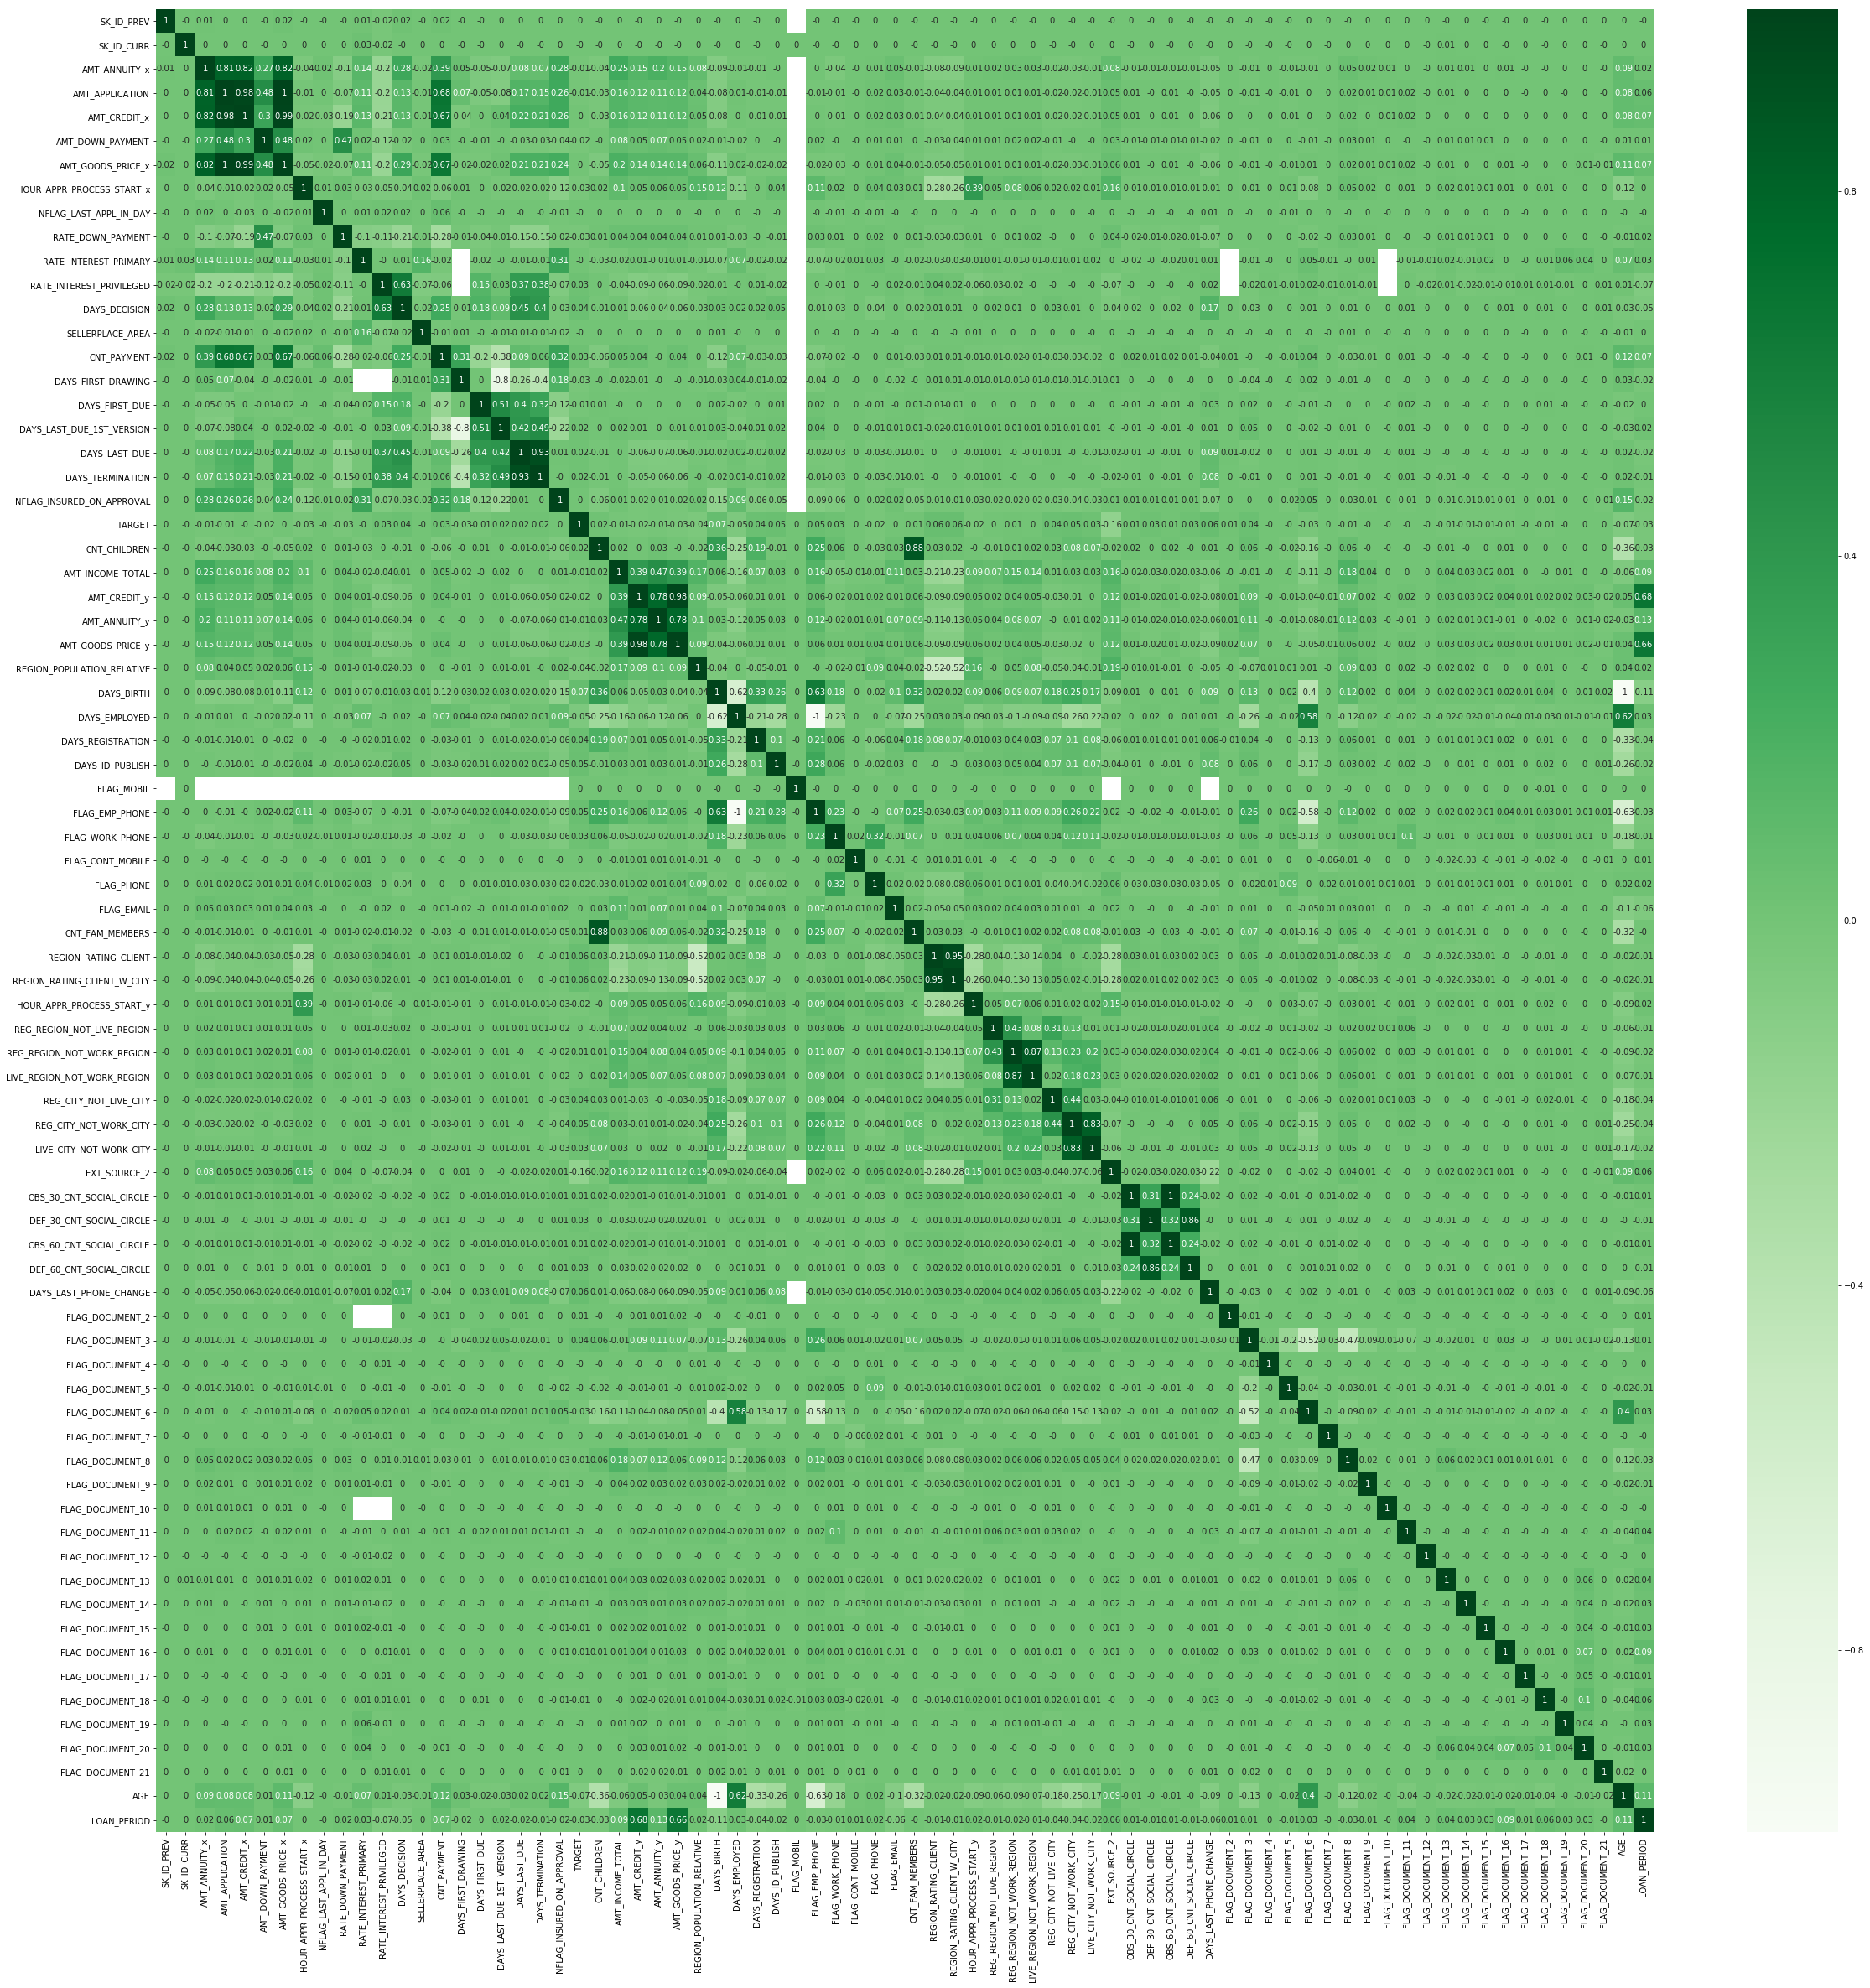

In [80]:
plt.figure(figsize=(40,40))
sns.heatmap(round(merged_data.corr(),2), annot=True, cmap='Greens')

**Observation:** Few of the columns are highly correlated. The columns being:
- DAYS_LAST_DUE and DAYS_TERMINATION
- AMT_ANNUITY_x, AMT_APPLICATION, AMT_CREDIT_x and AMT_GOODS_PRICE_x
- AMT_ANNUITY_y, AMT_CREDIT_y and AMT_GOODS_PRICE_y

#### - Bivariant analysis

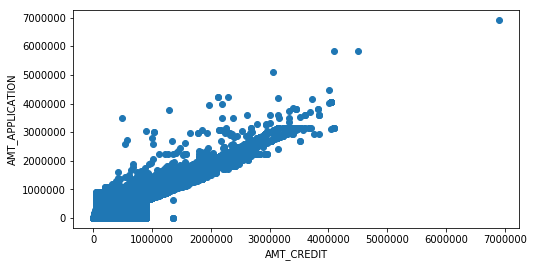

In [81]:
plt.figure(figsize=(8,4))
plt.scatter(previous_application.AMT_CREDIT, previous_application.AMT_APPLICATION)
plt.xlabel('AMT_CREDIT')
plt.ylabel('AMT_APPLICATION')
plt.show()

- **Observation:** The expected `loan amount` was not received everytime

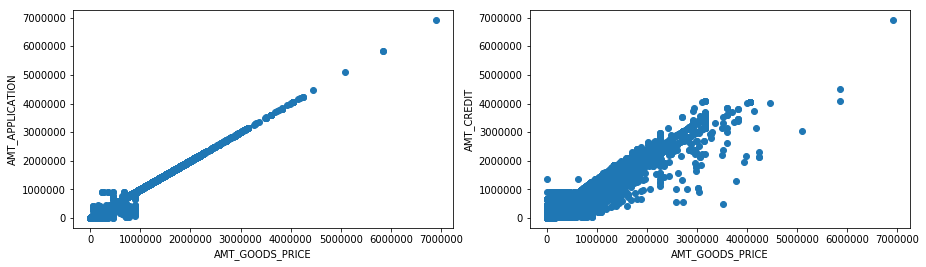

In [82]:
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
plt.scatter(previous_application.AMT_GOODS_PRICE, previous_application.AMT_APPLICATION)
plt.xlabel('AMT_GOODS_PRICE')
plt.ylabel('AMT_APPLICATION')
plt.subplot(1,2,2)
plt.scatter(previous_application.AMT_GOODS_PRICE, previous_application.AMT_CREDIT)
plt.xlabel('AMT_GOODS_PRICE')
plt.ylabel('AMT_CREDIT')
plt.show()

- **Observation:** From above, we can say that `AMT_APPLICATION/AMT_CREDIT` and `AMT_GOODS_PRICE` are linearly increasing

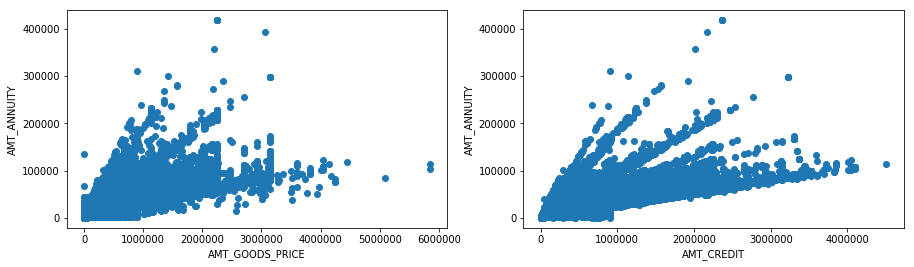

In [83]:
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
plt.scatter(previous_application.AMT_GOODS_PRICE, previous_application.AMT_ANNUITY)
plt.xlabel('AMT_GOODS_PRICE')
plt.ylabel('AMT_ANNUITY')
plt.subplot(1,2,2)
plt.scatter(previous_application.AMT_CREDIT, previous_application.AMT_ANNUITY)
plt.xlabel('AMT_CREDIT')
plt.ylabel('AMT_ANNUITY')
plt.show()

- **Observation:** From the previous graph we concluded that `AMT_CREDIT` and `AMT_GOODS_PRICE` are directly proportional which is the same in case of `AMT_ANNUITY` as well

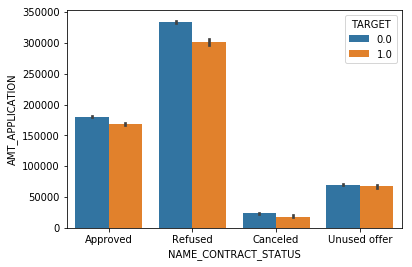

In [84]:
sns.barplot(merged_data.NAME_CONTRACT_STATUS, merged_data.AMT_APPLICATION, hue=merged_data.TARGET)
plt.show()

- **Observation:** We can see that loan has been `approved` for the `defaulters` in previous application and most of the `non-defaulters` were `refused`.

#### So based on the above explained insights, the bank can restructure its plans so that it can result in more profit and gains by approving loans to non-defaulting clients and making sure less credit loans are approved to defaulters or defaulters loan application are refused.